# Set Up & read in files - all accounts


This section is dedicated to reading in the files.

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import json      # library for working with JSON-formatted text strings
import pprint as pp    # library for cleanly printing Python data structures
import seaborn as sns
from datetime import datetime

In [107]:
import matplotlib.pyplot as plt

 Stylistic Choices 

In [159]:
sns.set(style="darkgrid")

In [108]:
tweet = "Final Results.csv"

tweet = pd.read_csv(tweet)
tweet
len(tweet)

34154

In [109]:
tweetsND = "Final Results ND.csv"

tweetsND = pd.read_csv(tweetsND)
tweetsND

tweetsND

,Unnamed: 0,username,time,tweet,likes,replies,user_ID
0,0,City of Philadelphia,2009-04-29T11:54:23,Statement from Mayor Nutter on Arlen Spector h...,0,0,PhiladelphiaGov
1,5,City of Philadelphia,2009-04-29T11:54:23,Statement from Mayor Nutter on Arlen Spector h...,0,0,PhiladelphiaGov
2,10,City of Philadelphia,2009-08-31T10:52:31,STATEMENT FROM MAYOR NUTTER ON TODAY’S PENNSYL...,0,0,PhiladelphiaGov
3,12,City of Philadelphia,2009-08-27T10:59:46,STATEMENT FROM MAYOR NUTTER ON SENATE APPROVAL...,0,0,PhiladelphiaGov
4,13,City of Philadelphia,2009-08-06T10:58:26,STATEMENT FROM MAYOR NUTTER ON PASSAGE OF HOUS...,0,0,PhiladelphiaGov
...,...,...,...,...,...,...,...
33563,264,Indy DBNS,2019-07-18T16:38:45,Good afternoon #Indy! We’re counting down to t...,8,0,IndyDBNS
33564,266,Indy DBNS,2019-05-24T18:05:16,Update from our friendly neighbors of @Speedwa...,2,0,IndyDBNS
33565,267,Indy DBNS,2019-05-16T00:44:05,"If available, join us 2morrow @IndyParksandRec...",2,0,IndyDBNS
33566,268,Indy DBNS,2019-05-10T14:42:22,The board is requesting clarification on the u...,1,0,IndyDBNS


In [110]:
accounts = "Case Study Accounts.csv"
accounts

accounts = pd.read_csv(accounts)
accounts

,user_ID,City,Emergency,Department
0,LACity,"Los Angeles, CA",1,City Account
1,CityofSeattle,"Seattle, WA",1,City Account
2,DenverCityGov,"Denver, CO",1,City Account
3,nycgov,"New York, NY",1,City Account
4,chicago,"Chicago, IL",1,City Account
...,...,...,...,...
233,NaN,"Jacksonville, FL",0,Other
234,TarrantCountyTX,"Fort Worth, TX",0,Other
235,CLTWater,"Charlotte, NC",0,Other
236,NaN,"Columbus, OH",0,Other


# Merge Case Study Accounts w/ Tweets

this merges the Climate Declaration and NON Climate-Dec cities, as well as merges a table that identifies the accounts by City, type of department, and if the city has declared a CE. 

In [113]:
merged = pd.concat([tweet,tweetsND])
merged

,Unnamed: 0,username,time,tweet,likes,replies,user_ID
0,0,Seattle Office of Planning & Community Develop...,2016-01-08T23:37:18,OPCD staff visited Lake City today to meet wit...,1,0,SeattleOPCD
1,1,Seattle Office of Planning & Community Develop...,2016-01-08T23:37:18,OPCD staff visited Lake City today to meet wit...,1,0,SeattleOPCD
2,3,Seattle Office of Planning & Community Develop...,2017-10-05T18:31:02,Bonus #ThrowbackThursday post: Ticket stub fro...,0,0,SeattleOPCD
3,4,Seattle Office of Planning & Community Develop...,2017-09-29T20:17:27,Here's some photos from yesterday's successful...,1,0,SeattleOPCD
4,5,Seattle Office of Planning & Community Develop...,2017-09-15T15:30:05,"A startup aims to stop gentrification, with he...",1,0,SeattleOPCD
...,...,...,...,...,...,...,...
33563,264,Indy DBNS,2019-07-18T16:38:45,Good afternoon #Indy! We’re counting down to t...,8,0,IndyDBNS
33564,266,Indy DBNS,2019-05-24T18:05:16,Update from our friendly neighbors of @Speedwa...,2,0,IndyDBNS
33565,267,Indy DBNS,2019-05-16T00:44:05,"If available, join us 2morrow @IndyParksandRec...",2,0,IndyDBNS
33566,268,Indy DBNS,2019-05-10T14:42:22,The board is requesting clarification on the u...,1,0,IndyDBNS


This merges the City Acconuts file, with info on type of dept, City, and CD (y/n)

In [112]:
# MERGED w/ City Accounts file

df = pd.merge(merged, accounts, on='user_ID', how='left')
df
len(df)

74049

Fixes the date

In [114]:
# ADD DATE IN generate result using pandas 
date = [] 
for x in df['time']: 
    data = datetime.strptime(x, "%Y-%m-%dT%H:%M:%S")
    print(data)
    date.append(data)
    
df["date"] = date   
df.head()

2016-01-08 23:37:18
2016-01-08 23:37:18
2017-10-05 18:31:02
2017-09-29 20:17:27
2017-09-15 15:30:05
2017-09-08 16:30:13
2017-08-18 16:00:08
2017-07-21 17:03:02
2017-07-17 17:51:40
2017-06-26 17:47:01
2017-06-22 18:04:04
2017-06-16 16:00:19
2017-10-05 18:31:02
2017-09-29 20:17:27
2017-09-15 15:30:05
2017-09-08 16:30:13
2017-08-18 16:00:08
2017-07-21 17:03:02
2017-07-17 17:51:40
2017-06-26 17:47:01
2017-06-22 18:04:04
2017-06-16 16:00:19
2016-05-17 19:30:01
2016-04-20 22:00:07
2016-04-18 16:01:01
2016-04-15 17:00:09
2016-04-06 22:21:14
2016-04-06 15:00:12
2016-04-04 19:01:01
2016-03-28 19:01:01
2016-03-25 19:01:01
2016-03-24 16:15:01
2016-03-15 16:00:09
2016-03-03 20:15:02
2016-02-19 17:15:01
2016-02-11 18:00:05
2016-05-17 19:30:01
2016-04-20 22:00:07
2016-04-18 16:01:01
2016-04-15 17:00:09
2016-04-06 22:21:14
2016-04-06 15:00:12
2016-04-04 19:01:01
2016-03-28 19:01:01
2016-03-25 19:01:01
2016-03-24 16:15:01
2016-03-15 16:00:09
2016-03-03 20:15:02
2016-02-19 17:15:01
2016-02-11 18:00:05


2013-12-06 17:00:37
2013-12-06 02:00:26
2013-12-06 00:11:09
2013-12-05 23:30:43
2013-12-05 20:30:26
2013-12-05 18:00:26
2013-12-05 00:55:14
2013-12-04 20:13:33
2013-12-03 01:15:44
2013-12-03 00:59:50
2013-12-02 22:48:08
2014-08-14 23:23:16
2014-08-14 16:56:11
2014-08-14 15:38:26
2014-08-13 21:18:24
2014-08-13 17:43:13
2014-08-13 17:13:38
2014-08-13 16:18:59
2014-08-13 15:57:40
2014-08-12 16:55:41
2014-08-14 23:23:16
2014-08-14 16:56:11
2014-08-14 15:38:26
2014-08-13 21:18:24
2014-08-13 17:43:13
2014-08-13 17:13:38
2014-08-13 16:18:59
2014-08-13 15:57:40
2014-08-12 16:55:41
2014-08-04 20:06:38
2014-08-04 20:04:16
2014-08-02 00:23:09
2014-08-01 22:42:38
2014-08-01 15:35:02
2014-08-01 01:05:32
2014-08-01 00:23:42
2014-08-01 00:12:46
2014-08-01 00:10:05
2014-07-31 23:52:58
2014-07-31 23:30:28
2014-07-31 23:29:51
2014-07-31 23:20:11
2014-07-31 22:55:04
2014-07-31 22:50:19
2014-07-31 20:39:51
2014-07-31 13:15:44
2014-07-27 01:19:40
2014-07-27 00:41:42
2014-07-24 00:12:55
2014-07-23 17:18:57


2016-05-12 17:40:18
2016-05-11 23:04:44
2016-05-11 16:34:43
2016-05-11 04:12:55
2016-05-10 16:08:09
2016-05-10 15:54:03
2016-05-10 14:54:33
2016-05-10 11:48:50
2016-05-09 23:56:38
2016-05-09 23:44:43
2016-05-08 01:07:03
2016-05-06 20:59:59
2016-05-06 00:14:41
2016-05-05 18:00:20
2016-05-05 15:05:39
2016-05-05 15:04:15
2016-05-05 03:27:45
2016-05-04 16:57:48
2016-05-03 20:38:01
2016-05-03 19:40:16
2016-05-01 03:19:04
2016-04-30 23:34:03
2016-04-29 17:52:08
2016-04-29 17:29:16
2016-04-28 22:14:28
2016-04-27 22:19:31
2016-04-26 01:38:46
2016-04-26 01:13:29
2016-04-23 23:26:47
2016-04-22 21:58:20
2016-04-21 20:37:22
2016-04-19 22:41:03
2016-04-18 21:30:47
2016-04-17 14:30:05
2016-04-17 12:00:14
2016-04-16 14:30:05
2016-04-16 12:00:23
2016-04-16 00:00:01
2016-04-15 14:30:12
2016-04-15 12:00:23
2016-04-15 00:32:42
2016-04-14 23:51:32
2016-04-14 23:41:42
2016-04-14 01:56:36
2016-04-14 01:15:10
2016-04-13 21:01:42
2016-04-12 23:53:50
2016-04-11 22:09:20
2016-04-11 13:49:10
2016-04-09 03:19:45


2017-08-16 16:25:02
2017-08-16 15:21:06
2017-08-16 14:01:03
2017-08-16 02:00:32
2017-08-15 23:00:38
2017-08-15 17:19:49
2017-08-15 15:03:29
2017-08-15 14:01:12
2017-08-15 02:00:23
2017-08-14 23:00:53
2017-08-14 12:50:55
2017-08-11 17:52:49
2017-08-11 00:37:39
2017-08-11 00:31:19
2017-08-10 23:16:02
2017-08-10 22:15:44
2017-08-10 00:54:19
2017-08-09 00:05:54
2017-08-08 23:08:53
2017-08-08 16:00:22
2017-08-08 15:00:53
2017-08-08 14:00:34
2017-08-08 13:00:09
2017-08-08 01:23:17
2017-08-07 17:46:19
2017-08-07 16:01:25
2017-08-07 15:06:58
2017-08-07 14:00:13
2017-08-07 13:01:03
2017-08-05 01:00:37
2017-08-05 00:00:44
2017-08-04 23:00:44
2017-08-04 22:01:04
2017-08-04 02:00:43
2017-08-04 01:00:37
2017-08-04 00:36:48
2017-08-04 00:00:18
2017-08-03 23:09:55
2017-08-03 23:00:51
2017-08-03 02:00:37
2017-08-03 01:00:13
2017-08-03 00:08:41
2017-08-03 00:00:52
2017-08-02 23:00:34
2017-08-02 22:00:29
2017-08-02 02:06:59
2017-08-02 01:01:02
2017-08-02 00:00:59
2017-08-01 23:00:24
2017-08-01 22:00:49


2020-03-02 23:15:33
2020-03-02 17:00:13
2020-03-02 16:57:29
2020-03-02 16:03:54
2020-03-02 15:01:49
2020-02-29 03:00:56
2020-02-29 02:02:42
2020-02-29 01:00:56
2020-02-29 00:00:46
2020-02-28 23:01:22
2020-02-28 16:00:51
2020-02-28 03:00:05
2020-02-28 02:01:10
2020-02-28 01:00:06
2020-02-28 00:01:30
2020-02-27 23:00:33
2020-02-27 16:00:47
2020-02-27 15:35:56
2020-02-27 15:12:36
2020-02-27 15:01:14
2020-02-27 02:00:21
2020-02-27 01:00:08
2020-02-27 00:40:20
2020-02-27 00:16:03
2020-02-26 23:10:45
2020-02-26 23:10:18
2020-02-26 23:00:34
2020-02-26 16:32:43
2020-02-26 16:00:25
2020-02-26 15:10:56
2020-02-26 02:00:49
2020-02-26 01:00:32
2020-02-26 00:01:00
2020-02-25 23:00:14
2020-02-25 22:23:30
2020-02-25 17:00:30
2020-02-25 16:01:25
2020-02-25 02:00:07
2020-02-25 01:28:37
2020-02-25 01:00:39
2020-02-25 00:01:17
2020-02-24 23:16:07
2020-02-24 16:01:01
2020-02-24 15:01:10
2020-02-22 18:00:02
2020-02-22 02:00:14
2020-02-22 01:00:21
2020-02-22 00:00:22
2020-02-21 22:36:31
2020-02-21 19:08:24


2019-02-08 01:14:41
2019-02-08 00:27:48
2019-02-08 00:11:40
2019-02-07 23:30:56
2019-02-07 15:30:24
2019-02-07 14:32:19
2019-02-07 14:29:42
2019-02-07 14:25:21
2019-02-07 02:09:46
2019-02-06 18:16:40
2019-02-06 17:02:50
2019-02-06 03:09:40
2019-02-06 02:08:47
2019-02-06 01:22:54
2019-02-05 17:56:15
2019-02-05 15:58:05
2019-02-05 14:16:54
2019-02-05 00:57:19
2019-02-04 21:37:46
2019-02-04 18:42:39
2019-02-04 16:14:36
2019-02-02 21:43:31
2019-02-02 19:59:15
2019-02-02 17:48:00
2019-02-02 01:02:51
2019-02-02 00:00:07
2019-02-01 00:00:32
2019-01-31 16:00:42
2019-01-31 02:14:07
2019-01-31 01:53:36
2019-01-31 01:44:41
2019-01-31 00:08:26
2019-01-30 01:31:40
2019-01-30 00:00:24
2019-01-29 19:13:34
2019-01-29 18:33:55
2019-01-29 02:00:41
2019-01-29 00:00:14
2019-01-28 15:25:47
2019-01-26 02:40:44
2019-01-26 01:34:16
2019-01-26 01:13:19
2019-01-26 00:54:26
2019-01-25 23:44:03
2019-01-25 22:34:43
2019-01-25 02:12:40
2019-01-25 02:11:21
2019-01-24 02:34:54
2019-01-23 00:45:32
2019-01-22 16:54:52


2017-01-10 19:59:39
2017-01-06 16:06:12
2017-01-05 20:52:26
2017-01-04 18:26:18
2017-01-04 17:55:17
2017-01-01 01:33:19
2016-12-30 22:08:18
2016-12-29 02:00:18
2016-12-28 18:56:54
2016-12-23 18:01:46
2016-12-20 01:48:16
2016-12-11 22:00:44
2016-12-09 18:26:00
2016-12-07 04:05:11
2016-11-30 22:34:03
2016-11-29 17:14:15
2016-11-29 15:51:47
2016-11-29 03:30:15
2016-11-28 22:38:37
2016-11-28 17:39:45
2016-11-21 21:00:30
2016-11-17 16:50:27
2016-11-11 02:19:59
2016-11-10 21:02:58
2016-11-08 15:15:36
2016-11-07 00:33:30
2016-11-05 16:30:48
2016-11-05 04:25:09
2016-11-04 18:25:12
2016-11-03 18:40:24
2016-11-02 18:56:00
2016-11-01 15:52:46
2016-11-01 08:30:20
2016-11-01 01:01:00
2016-10-30 23:00:52
2016-10-26 14:40:18
2016-10-24 21:25:23
2016-10-24 19:19:31
2016-10-22 01:51:35
2016-10-22 01:26:15
2016-10-22 00:38:45
2016-10-21 00:37:29
2016-10-20 15:45:36
2016-10-20 15:39:26
2016-10-20 14:13:08
2016-10-19 23:11:05
2016-10-19 23:01:54
2016-10-19 22:35:13
2016-10-19 01:53:37
2016-10-17 21:47:55


2014-09-11 19:57:05
2014-09-09 14:34:33
2014-09-08 15:55:24
2014-09-05 15:53:14
2016-05-13 17:10:34
2016-05-13 17:10:34
2016-05-05 14:01:16
2016-04-29 13:42:25
2016-04-27 19:51:53
2016-04-22 13:56:18
2016-04-21 21:20:41
2016-04-05 22:05:45
2016-04-05 18:02:35
2016-04-05 14:14:57
2016-04-04 15:00:09
2016-03-31 16:02:10
2016-03-30 18:02:36
2016-03-28 15:00:40
2016-03-28 14:56:55
2016-03-28 14:50:35
2016-03-28 14:33:34
2016-03-26 18:01:34
2016-03-25 14:02:53
2016-03-22 16:26:44
2016-03-17 20:41:46
2016-03-17 16:02:09
2016-03-16 14:20:59
2016-03-11 14:03:10
2016-03-04 21:22:51
2016-02-26 17:35:38
2016-02-22 17:15:17
2016-02-15 17:04:20
2016-02-14 14:10:34
2016-02-10 20:10:05
2016-02-10 18:02:49
2016-01-29 17:25:45
2016-01-28 15:02:14
2016-01-27 00:49:27
2016-01-26 23:35:07
2016-01-26 14:22:16
2016-01-24 13:00:43
2016-01-22 17:00:35
2016-01-14 15:08:03
2016-01-14 15:07:14
2016-01-13 15:04:07
2017-06-08 14:30:32
2017-06-07 20:28:36
2017-06-07 19:09:45
2017-06-08 14:30:32
2017-06-07 20:28:36


2016-10-19 21:03:00
2016-10-18 14:43:00
2016-10-06 19:43:00
2016-10-04 14:02:01
2016-09-30 15:40:05
2017-06-08 18:22:14
2017-05-01 15:08:59
2017-04-21 20:04:19
2017-04-17 16:34:21
2017-04-06 16:35:01
2017-03-30 14:47:30
2017-03-28 14:20:49
2017-03-27 14:33:43
2017-03-13 15:18:30
2017-03-10 19:01:34
2019-11-25 21:26:55
2019-11-25 20:12:54
2019-11-21 19:26:04
2019-11-15 20:08:13
2018-10-09 18:34:56
2018-10-05 17:32:13
2018-10-04 18:21:39
2018-10-04 18:10:51
2018-10-02 14:14:33
2018-09-27 21:29:17
2018-09-25 21:26:07
2018-09-18 18:49:44
2018-09-13 20:42:32
2019-03-07 22:14:09
2019-02-13 20:03:15
2019-02-07 19:49:37
2019-02-07 19:11:00
2019-02-05 15:50:34
2019-01-29 18:53:49
2019-01-24 22:26:22
2020-03-31 20:18:11
2020-03-23 18:59:00
2020-03-21 20:08:33
2020-03-19 19:28:19
2020-03-16 16:55:44
2020-03-05 20:15:31
2020-02-21 20:52:24
2020-02-21 16:55:03
2018-06-27 15:31:46
2018-06-16 22:29:27
2018-06-04 15:04:56
2018-05-07 19:05:00
2018-05-03 18:40:57
2018-04-30 20:15:23
2018-06-27 15:31:46


2016-01-07 14:51:37
2016-01-07 14:51:37
2016-01-07 14:47:32
2016-01-07 14:47:32
2016-01-07 14:15:44
2016-01-07 14:15:44
2016-01-07 14:01:20
2016-01-07 14:01:20
2016-01-07 09:38:59
2016-01-07 09:38:59
2016-01-07 04:41:51
2016-01-07 04:41:51
2016-01-07 01:49:01
2016-01-07 01:49:01
2016-01-05 22:11:03
2016-01-05 22:11:03
2016-01-05 21:12:05
2016-01-05 21:12:05
2016-01-05 19:50:03
2016-01-05 19:50:03
2015-12-29 04:18:20
2015-12-29 04:18:20
2015-12-23 00:28:03
2015-12-23 00:28:03
2015-12-14 06:54:45
2015-12-14 06:54:45
2015-12-13 05:42:42
2015-12-13 05:42:42
2015-12-12 05:20:27
2015-12-12 05:20:27
2015-12-11 21:19:47
2015-12-11 21:19:47
2015-12-03 18:27:01
2015-12-03 18:27:01
2015-12-03 14:46:32
2015-12-03 14:46:32
2015-12-01 19:20:41
2015-12-01 19:20:41
2015-11-30 22:07:13
2015-11-30 22:07:13
2015-11-27 17:08:53
2015-11-27 17:08:53
2015-11-25 21:09:34
2015-11-25 21:09:34
2015-11-24 20:22:19
2015-11-24 20:22:19
2015-11-16 20:07:39
2015-11-16 20:07:39
2015-10-21 16:23:47
2015-10-21 16:23:47


2018-10-08 22:30:26
2018-10-04 22:22:29
2018-10-03 20:24:06
2018-09-28 23:50:56
2018-09-23 01:39:53
2018-09-19 17:45:09
2018-09-13 20:21:57
2018-08-31 17:52:50
2018-08-30 22:12:21
2018-08-28 20:17:52
2018-08-27 19:02:18
2018-08-27 17:09:11
2018-08-22 23:11:00
2018-08-21 18:49:51
2018-08-18 17:00:42
2018-08-13 19:53:54
2018-08-07 19:37:41
2018-08-07 19:14:39
2018-07-31 22:33:59
2018-07-27 19:14:11
2018-07-27 18:27:00
2018-07-26 15:56:21
2018-07-23 21:35:29
2018-07-23 13:57:53
2018-07-23 13:49:22
2018-07-20 16:47:32
2018-07-19 23:22:47
2018-07-17 20:30:35
2018-07-16 16:21:00
2018-07-16 03:00:27
2018-07-08 16:00:54
2018-07-03 18:29:50
2019-03-12 20:45:48
2019-03-12 20:17:10
2019-03-10 17:00:58
2019-03-09 22:00:34
2019-03-08 22:00:58
2019-03-08 18:20:38
2019-03-08 17:46:43
2019-03-07 19:22:35
2019-03-06 20:03:33
2019-03-06 20:02:47
2019-03-05 17:04:18
2019-03-12 20:45:48
2019-03-12 20:17:10
2019-03-10 17:00:58
2019-03-09 22:00:34
2019-03-08 22:00:58
2019-03-08 18:20:38
2019-03-08 17:46:43


2019-04-05 23:59:48
2017-01-28 17:31:25
2017-01-05 23:37:51
2017-01-04 17:51:15
2016-12-14 05:17:14
2016-12-09 19:15:11
2016-11-01 20:52:19
2016-11-01 01:44:54
2016-10-20 21:01:58
2016-10-20 15:49:02
2016-10-18 20:53:46
2016-10-07 21:16:27
2017-01-28 17:31:25
2017-01-05 23:37:51
2017-01-04 17:51:15
2016-12-14 05:17:14
2016-12-09 19:15:11
2016-11-01 20:52:19
2016-11-01 01:44:54
2016-10-20 21:01:58
2016-10-20 15:49:02
2016-10-18 20:53:46
2016-10-07 21:16:27
2016-09-20 19:44:41
2016-09-18 20:47:25
2016-09-18 17:12:04
2016-09-01 22:47:54
2016-08-31 02:17:55
2016-08-21 17:55:42
2016-08-10 18:23:14
2016-07-20 19:53:55
2016-07-18 21:33:56
2016-07-01 06:05:54
2016-06-22 15:11:32
2016-06-22 00:22:53
2016-06-10 23:29:34
2016-06-07 21:11:32
2016-06-02 16:10:27
2016-05-27 00:03:08
2016-09-20 19:44:41
2016-09-18 20:47:25
2016-09-18 17:12:04
2016-09-01 22:47:54
2016-08-31 02:17:55
2016-08-21 17:55:42
2016-08-10 18:23:14
2016-07-20 19:53:55
2016-07-18 21:33:56
2016-07-01 06:05:54
2016-06-22 15:11:32


2013-12-11 16:14:06
2016-04-27 16:12:02
2016-04-01 17:00:39
2016-02-29 18:30:02
2016-02-25 13:30:44
2016-02-22 21:17:21
2016-02-15 22:37:48
2016-02-08 20:30:47
2016-02-01 17:41:02
2016-01-28 01:25:25
2016-01-25 18:52:35
2016-01-21 20:58:11
2016-04-27 16:12:02
2016-04-01 17:00:39
2016-02-29 18:30:02
2016-02-25 13:30:44
2016-02-22 21:17:21
2016-02-15 22:37:48
2016-02-08 20:30:47
2016-02-01 17:41:02
2016-01-28 01:25:25
2016-01-25 18:52:35
2016-01-21 20:58:11
2016-01-18 19:10:30
2012-02-17 22:23:50
2012-02-16 20:18:13
2012-02-06 18:04:50
2012-02-06 16:35:54
2012-02-01 21:45:04
2012-02-01 21:42:01
2012-01-27 22:32:50
2011-12-28 23:29:52
2011-12-21 21:38:26
2011-12-09 14:05:11
2011-12-07 20:53:20
2011-11-28 21:47:10
2012-02-17 22:23:50
2012-02-16 20:18:13
2012-02-06 18:04:50
2012-02-06 16:35:54
2012-02-01 21:45:04
2012-02-01 21:42:01
2012-01-27 22:32:50
2011-12-28 23:29:52
2011-12-21 21:38:26
2011-12-09 14:05:11
2011-12-07 20:53:20
2011-11-28 21:47:10
2011-11-17 17:40:53
2011-11-14 13:55:08


2012-11-18 23:45:39
2012-11-18 23:00:55
2012-11-18 22:10:28
2012-11-18 16:54:06
2012-11-18 16:51:51
2012-11-18 04:30:23
2012-11-18 03:25:06
2012-11-18 00:05:10
2012-11-17 23:42:54
2012-11-17 23:02:38
2012-11-17 15:30:10
2012-11-17 06:52:55
2012-11-17 06:45:16
2012-11-17 03:48:59
2012-11-16 19:41:27
2012-11-15 15:34:17
2013-07-25 18:32:59
2013-07-22 15:39:36
2013-07-11 22:04:30
2013-07-11 21:47:23
2013-07-11 18:29:35
2013-07-25 18:32:59
2013-07-22 15:39:36
2013-07-11 22:04:30
2013-07-11 21:47:23
2013-07-11 18:29:35
2013-07-11 12:00:03
2013-07-04 18:00:33
2013-06-27 17:01:09
2013-06-24 21:40:24
2013-06-18 16:35:28
2013-06-18 13:32:57
2013-06-09 23:53:35
2013-05-08 21:43:10
2013-04-24 19:12:31
2013-04-23 20:02:03
2013-04-23 19:48:16
2013-04-23 19:44:17
2013-04-19 15:17:01
2013-04-18 14:56:48
2013-04-15 21:47:21
2013-04-04 11:01:36
2013-04-04 10:01:45
2013-04-04 01:01:25
2013-04-03 21:31:34
2013-04-03 14:33:12
2013-04-03 12:26:45
2013-04-03 11:21:41
2013-04-03 10:53:48
2013-03-21 20:45:25


2017-05-23 00:43:45
2017-05-03 23:18:00
2017-05-03 22:38:14
2017-05-01 01:15:07
2017-04-29 19:00:45
2017-04-29 17:00:43
2017-04-29 15:30:38
2017-04-27 18:11:40
2017-04-26 17:45:07
2017-04-25 23:41:46
2017-04-25 16:24:10
2017-04-17 15:15:28
2017-04-16 20:25:06
2017-04-16 18:15:09
2017-04-15 19:50:09
2017-04-15 17:25:05
2017-04-14 16:55:40
2017-04-06 19:25:37
2017-04-05 18:09:43
2017-03-27 17:46:33
2017-03-26 21:10:08
2017-03-25 00:16:28
2017-03-23 20:29:03
2017-03-22 17:15:15
2017-03-20 16:20:19
2017-03-18 18:55:09
2017-03-11 01:46:06
2017-03-03 00:24:30
2017-03-02 19:41:13
2017-02-16 00:46:01
2014-04-09 20:13:42
2014-03-24 18:50:35
2014-03-21 19:15:31
2014-03-21 18:45:37
2014-03-17 21:02:03
2014-03-17 20:05:39
2014-03-13 20:20:46
2014-03-12 23:47:21
2014-04-09 20:13:42
2014-03-24 18:50:35
2014-03-21 19:15:31
2014-03-21 18:45:37
2014-03-17 21:02:03
2014-03-17 20:05:39
2014-03-13 20:20:46
2014-03-12 23:47:21
2014-03-09 16:05:29
2014-02-13 22:23:43
2014-02-07 19:05:39
2014-02-07 00:27:07


2017-10-21 00:40:50
2017-10-20 20:14:21
2019-03-17 01:02:49
2019-03-16 20:55:39
2019-03-16 20:54:54
2019-03-16 20:43:46
2019-03-16 20:35:56
2019-03-16 20:30:49
2019-03-16 20:29:55
2019-03-16 18:16:11
2019-03-16 17:49:46
2019-03-16 17:43:41
2019-03-15 18:25:27
2019-03-14 22:46:24
2019-03-14 22:00:55
2019-03-14 21:59:54
2019-03-14 21:30:40
2019-03-14 01:30:11
2019-03-13 18:53:02
2019-03-17 01:02:49
2019-03-16 20:55:39
2019-03-16 20:54:54
2019-03-16 20:43:46
2019-03-16 20:35:56
2019-03-16 20:30:49
2019-03-16 20:29:55
2019-03-16 18:16:11
2019-03-16 17:49:46
2019-03-16 17:43:41
2019-03-15 18:25:27
2019-03-14 22:46:24
2019-03-14 22:00:55
2019-03-14 21:59:54
2019-03-14 21:30:40
2019-03-14 01:30:11
2019-03-13 18:53:02
2019-03-11 20:30:07
2019-03-08 23:31:25
2019-03-08 06:03:07
2019-03-07 20:04:04
2019-03-07 19:59:25
2019-03-06 23:58:37
2019-03-05 20:14:41
2019-03-05 18:14:12
2019-03-04 22:27:43
2019-03-04 01:55:00
2019-03-01 20:35:47
2019-03-01 01:56:39
2019-03-01 01:36:00
2019-02-28 03:30:07


2019-09-26 21:15:47
2019-09-24 18:44:14
2019-09-21 18:32:59
2019-09-21 18:32:59
2019-09-13 15:49:00
2018-02-07 00:03:49
2018-01-23 12:31:52
2018-02-07 00:03:49
2018-01-23 12:31:52
2018-01-08 20:37:10
2017-12-22 01:32:46
2017-12-09 21:29:54
2017-12-09 19:58:15
2017-11-09 22:03:59
2017-11-01 21:27:18
2019-02-07 03:03:17
2019-01-17 06:00:17
2019-02-07 03:03:17
2019-01-17 06:00:17
2019-01-08 19:24:19
2019-01-07 01:52:49
2018-12-28 17:17:49
2018-11-26 21:01:12
2018-11-19 17:40:07
2018-11-13 23:56:10
2020-03-28 17:26:33
2020-03-26 02:30:10
2020-03-24 00:14:18
2020-03-22 22:56:01
2020-03-13 01:47:50
2020-03-10 22:36:10
2020-03-04 18:22:51
2020-02-29 23:27:11
2020-02-28 01:36:51
2020-02-22 22:02:26
2020-02-16 18:00:15
2020-02-12 18:22:36
2020-02-09 18:00:14
2020-02-09 18:00:14
2020-02-06 06:12:13
2020-01-31 21:52:59
2020-01-20 20:49:55
2020-01-18 19:55:43
2020-01-05 20:00:21
2019-12-24 17:00:34
2019-12-21 17:25:53
2019-12-21 17:00:27
2019-12-13 21:34:54
2019-12-13 18:36:22
2019-12-11 23:18:29


2015-04-07 17:16:13
2015-04-04 22:33:21
2015-04-04 22:33:21
2015-03-11 19:19:56
2015-03-11 19:19:56
2015-03-06 19:54:24
2015-03-06 19:54:24
2015-03-05 22:18:59
2015-03-05 22:18:59
2015-03-05 18:13:31
2015-03-05 18:13:31
2015-02-28 01:35:30
2015-02-28 01:35:30
2015-02-19 16:05:25
2015-02-19 16:05:25
2015-02-13 03:05:52
2015-02-13 03:05:52
2015-04-26 17:26:48
2015-04-26 17:26:48
2015-04-07 22:08:10
2015-04-07 22:08:10
2015-04-07 17:16:13
2015-04-07 17:16:13
2015-04-04 22:33:21
2015-04-04 22:33:21
2015-03-11 19:19:56
2015-03-11 19:19:56
2015-03-06 19:54:24
2015-03-06 19:54:24
2015-03-05 22:18:59
2015-03-05 22:18:59
2015-03-05 18:13:31
2015-03-05 18:13:31
2015-02-28 01:35:30
2015-02-28 01:35:30
2015-02-19 16:05:25
2015-02-19 16:05:25
2015-02-13 03:05:52
2015-02-13 03:05:52
2015-02-08 01:24:06
2015-02-08 01:24:06
2015-01-31 19:44:27
2015-01-31 19:44:27
2015-01-23 02:38:10
2015-01-23 02:38:10
2015-01-20 19:06:20
2015-01-20 19:06:20
2015-08-13 17:36:50
2015-08-13 17:36:50
2015-07-24 00:56:39


2012-05-02 15:02:03
2012-05-01 13:31:09
2012-04-26 15:04:22
2012-04-25 14:02:26
2012-04-24 23:01:14
2012-04-21 22:24:03
2012-04-13 14:31:19
2012-04-13 13:15:07
2012-03-30 23:45:22
2012-03-16 00:35:46
2012-03-14 17:19:42
2012-03-14 00:25:05
2012-03-01 14:10:44
2011-06-01 21:59:26
2011-05-16 21:19:24
2011-05-16 15:15:01
2011-05-16 15:15:01
2011-05-12 15:13:00
2011-05-12 15:12:01
2011-05-11 15:08:00
2011-05-11 15:08:00
2011-05-09 14:56:00
2011-05-09 14:56:00
2011-05-08 15:53:00
2011-05-08 15:52:04
2011-05-06 14:55:00
2011-05-05 15:50:01
2011-05-05 15:50:00
2011-05-03 15:34:01
2011-05-02 18:35:02
2011-04-26 14:49:48
2011-04-22 15:55:17
2011-06-01 21:59:26
2011-05-16 21:19:24
2011-05-16 15:15:01
2011-05-16 15:15:01
2011-05-12 15:13:00
2011-05-12 15:12:01
2011-05-11 15:08:00
2011-05-11 15:08:00
2011-05-09 14:56:00
2011-05-09 14:56:00
2011-05-08 15:53:00
2011-05-08 15:52:04
2011-05-06 14:55:00
2011-05-05 15:50:01
2011-05-05 15:50:00
2011-05-03 15:34:01
2011-05-02 18:35:02
2011-04-26 14:49:48


2017-01-13 00:14:40
2017-01-10 22:09:04
2020-03-27 21:36:07
2020-03-24 20:29:07
2018-06-28 20:33:23
2016-09-26 16:26:44
2016-09-23 16:08:57
2016-09-20 00:56:19
2016-09-09 14:47:12
2016-09-08 20:37:00
2016-09-07 23:11:15
2016-09-07 18:38:42
2016-09-07 13:07:18
2016-09-06 15:11:25
2016-09-05 21:01:40
2017-06-07 14:12:51
2017-06-01 13:17:54
2017-05-31 18:30:10
2019-11-28 16:06:11
2018-02-21 18:23:49
2018-02-15 16:24:37
2018-02-15 14:22:48
2018-02-02 18:48:41
2018-02-21 18:23:49
2018-02-15 16:24:37
2018-02-15 14:22:48
2018-02-02 18:48:41
2017-10-18 19:41:57
2017-10-17 19:01:32
2017-10-11 14:26:17
2017-10-04 01:10:35
2017-09-24 00:45:40
2017-10-18 19:41:57
2017-10-17 19:01:32
2017-10-11 14:26:17
2017-10-04 01:10:35
2017-09-24 00:45:40
2017-09-07 14:58:36
2017-09-01 02:30:31
2017-08-31 15:45:38
2017-08-31 15:03:32
2017-08-24 12:29:14
2017-08-19 19:38:45
2017-08-19 18:42:52
2017-08-19 18:18:58
2017-08-19 18:18:38
2017-08-19 17:42:38
2017-08-19 17:41:52
2017-08-19 17:03:32
2017-08-19 16:52:45


2020-03-04 17:29:21
2020-02-26 14:31:03
2020-02-25 14:32:17
2020-02-18 18:02:52
2020-02-18 17:20:33
2020-02-12 14:31:41
2020-02-11 14:23:47
2020-02-10 16:48:30
2020-02-07 22:31:07
2020-01-30 15:28:55
2020-01-16 23:21:17
2020-01-16 23:14:46
2020-01-16 23:02:19
2020-01-07 15:53:09
2019-12-18 22:01:40
2019-12-16 16:21:30
2019-12-12 22:09:05
2019-12-09 14:58:40
2019-12-04 19:39:49
2018-11-02 19:46:39
2018-11-02 19:46:39
2018-10-26 15:07:14
2018-10-19 18:58:20
2018-10-12 20:11:42
2018-10-05 19:48:08
2018-09-28 20:27:32
2018-09-21 19:37:33
2018-09-14 19:32:58
2018-09-07 15:39:32
2018-08-31 16:59:56
2018-08-23 17:15:25
2018-08-17 18:08:57
2018-08-14 15:00:28
2018-08-10 17:52:24
2018-08-03 19:58:20
2018-07-27 19:08:00
2018-07-20 16:03:00
2018-07-17 16:25:09
2018-07-13 18:30:36
2019-03-15 16:49:36
2019-03-08 20:36:59
2019-03-01 17:02:54
2019-03-15 16:49:36
2019-03-08 20:36:59
2019-03-01 17:02:54
2019-02-22 17:42:53
2019-02-15 16:31:42
2019-02-08 19:59:52
2019-02-01 19:34:01
2019-01-25 20:30:48


2020-04-07 17:00:44
2020-04-07 14:00:26
2020-04-07 13:30:09
2020-04-06 23:00:12
2020-04-06 21:30:12
2020-04-06 20:00:20
2020-04-06 18:30:24
2020-04-06 18:00:20
2020-04-06 17:00:22
2020-04-06 16:00:23
2020-04-06 15:30:17
2020-04-07 22:26:14
2020-04-07 19:30:17
2020-04-07 19:00:17
2020-04-07 18:00:27
2020-04-07 17:00:44
2020-04-07 14:00:26
2020-04-07 13:30:09
2020-04-06 23:00:12
2020-04-06 21:30:12
2020-04-06 20:00:20
2020-04-06 18:30:24
2020-04-06 18:00:20
2020-04-06 17:00:22
2020-04-06 16:00:23
2020-04-06 15:30:17
2020-04-06 14:30:11
2020-04-06 14:00:29
2020-04-06 13:00:22
2020-04-05 22:30:08
2020-04-05 21:45:04
2020-04-05 21:15:05
2020-04-05 13:00:39
2020-04-04 14:30:31
2020-04-04 13:00:37
2020-04-03 21:00:35
2020-04-03 17:00:54
2020-04-03 16:01:14
2020-04-03 14:30:40
2020-04-02 22:00:21
2020-04-02 13:00:57
2020-04-01 23:00:41
2020-04-01 21:00:31
2020-04-01 18:00:33
2020-04-01 17:30:26
2020-04-01 16:00:36
2020-04-01 13:59:46
2020-03-31 21:30:19
2020-03-31 21:00:26
2020-03-31 18:00:31


2009-11-17 00:18:36
2009-11-17 00:15:26
2009-11-10 18:50:31
2009-11-10 18:48:48
2009-11-05 23:58:42
2009-11-05 23:56:40
2009-10-16 21:07:32
2009-10-16 21:06:03
2013-07-23 23:03:43
2013-07-23 15:27:36
2013-07-16 20:56:00
2013-07-01 06:15:51
2013-06-13 19:50:55
2013-05-30 20:21:30
2013-05-24 18:16:53
2013-05-13 21:35:49
2013-05-01 20:05:17
2013-04-18 19:09:25
2013-04-15 15:30:42
2013-04-15 15:27:49
2013-03-28 21:35:06
2013-03-20 21:50:20
2013-07-23 23:03:43
2013-07-23 15:27:36
2013-07-16 20:56:00
2013-07-01 06:15:51
2013-06-13 19:50:55
2013-05-30 20:21:30
2013-05-24 18:16:53
2013-05-13 21:35:49
2013-05-01 20:05:17
2013-04-18 19:09:25
2013-04-15 15:30:42
2013-04-15 15:27:49
2013-03-28 21:35:06
2013-03-20 21:50:20
2010-05-18 00:32:56
2010-05-15 00:29:00
2010-05-04 00:59:54
2010-04-28 00:51:37
2010-04-23 00:42:34
2010-04-23 00:42:33
2010-04-07 19:26:32
2010-03-30 20:45:27
2010-03-27 00:30:38
2010-03-25 00:38:43
2010-03-17 00:58:08
2010-03-09 00:34:39
2010-03-02 20:03:26
2010-02-24 00:31:45


2011-11-26 20:29:42
2011-11-23 14:38:50
2011-11-18 19:02:00
2011-11-14 17:09:46
2011-11-11 21:32:20
2011-11-11 21:27:22
2011-11-02 21:02:23
2011-11-01 20:49:27
2011-11-01 18:47:41
2011-11-01 14:51:24
2011-10-29 20:27:14
2011-10-25 19:24:26
2011-10-24 21:31:32
2013-12-03 22:15:09
2013-11-22 19:00:20
2013-11-20 17:05:34
2013-11-14 22:46:13
2013-11-14 20:53:01
2013-11-14 19:28:06
2013-11-14 19:26:29
2013-11-14 19:18:55
2013-11-14 19:09:37
2013-12-03 22:15:09
2013-11-22 19:00:20
2013-11-20 17:05:34
2013-11-14 22:46:13
2013-11-14 20:53:01
2013-11-14 19:28:06
2013-11-14 19:26:29
2013-11-14 19:18:55
2013-11-14 19:09:37
2013-11-07 22:12:47
2013-11-07 21:41:51
2013-11-05 20:15:20
2013-11-05 18:59:19
2013-11-04 18:33:28
2013-10-03 12:46:49
2013-08-15 15:37:14
2013-08-09 14:42:50
2013-08-06 21:33:08
2013-07-31 17:14:51
2012-11-09 23:45:00
2012-11-09 23:45:00
2012-10-01 16:56:22
2012-09-30 13:19:22
2012-09-28 12:54:35
2012-09-27 15:29:47
2012-09-23 14:03:24
2012-09-19 15:13:55
2012-09-14 21:30:40


2011-02-25 17:20:37
2012-05-19 13:01:29
2012-05-17 13:31:10
2012-05-14 20:19:52
2012-05-07 19:20:09
2012-05-19 13:01:29
2012-05-17 13:31:10
2012-05-14 20:19:52
2012-05-07 19:20:09
2016-07-18 17:30:11
2016-07-18 17:30:11
2013-03-21 16:00:14
2013-03-21 16:00:14
2013-12-03 22:15:09
2013-10-31 18:08:52
2013-10-16 13:41:41
2013-09-05 14:27:56
2013-08-29 20:15:43
2013-12-03 22:15:09
2013-10-31 18:08:52
2013-10-16 13:41:41
2013-09-05 14:27:56
2013-08-29 20:15:43
2015-12-02 16:49:23
2015-12-02 16:49:23
2011-02-03 18:24:22
2011-02-03 15:28:44
2011-01-25 17:21:20
2011-01-10 21:59:45
2011-01-10 21:26:23
2011-01-05 18:42:24
2010-12-23 15:01:59
2010-12-13 15:50:45
2010-12-10 21:48:25
2010-11-16 23:31:47
2010-10-18 22:34:37
2011-02-03 18:24:22
2011-02-03 15:28:44
2011-01-25 17:21:20
2011-01-10 21:59:45
2011-01-10 21:26:23
2011-01-05 18:42:24
2010-12-23 15:01:59
2010-12-13 15:50:45
2010-12-10 21:48:25
2010-11-16 23:31:47
2010-10-18 22:34:37
2017-02-02 18:38:45
2017-02-01 19:05:53
2016-12-06 18:20:05


2014-09-18 13:22:38
2017-10-05 19:10:09
2017-09-29 18:45:11
2017-09-25 19:05:06
2017-09-19 22:00:54
2017-09-18 17:50:07
2017-09-14 22:50:10
2017-08-23 16:55:09
2017-08-03 12:55:04
2017-08-01 16:19:54
2017-07-27 16:52:05
2017-07-14 12:55:09
2014-07-09 17:50:35
2014-06-10 17:45:03
2014-06-10 14:13:53
2014-05-29 12:32:28
2014-05-28 15:59:51
2014-05-13 15:48:26
2014-05-08 18:32:22
2014-04-27 17:04:54
2014-04-17 18:02:53
2014-04-16 11:13:43
2014-04-15 20:36:17
2018-06-27 18:30:10
2018-06-18 20:09:34
2018-04-30 19:31:24
2018-04-27 19:00:32
2018-04-09 23:00:39
2018-03-27 22:00:46
2018-03-26 21:53:50
2018-03-13 18:55:04
2018-03-13 16:15:14
2013-11-21 16:53:21
2013-11-21 15:43:27
2013-11-08 14:46:59
2013-11-08 14:39:37
2013-10-28 17:36:21
2013-10-23 23:45:46
2013-10-03 16:21:14
2013-09-30 20:17:20
2013-09-09 13:17:57
2013-09-04 13:14:16
2013-08-26 13:42:14
2013-08-01 11:51:24
2019-07-08 14:54:35
2019-05-28 14:45:12
2019-05-20 20:23:11
2019-05-17 15:26:03
2018-02-14 22:06:56
2018-02-09 22:08:41


2020-03-15 16:33:12
2020-03-14 16:33:41
2020-03-13 20:15:59
2020-03-13 15:53:48
2020-03-12 18:40:08
2020-03-11 23:19:11
2020-03-11 17:59:01
2020-03-11 17:54:39
2020-03-11 14:20:03
2020-03-07 13:57:43
2020-03-05 16:56:11
2020-03-05 00:20:36
2020-03-03 23:46:49
2020-02-26 16:30:38
2020-02-20 17:18:01
2020-02-19 13:12:52
2020-02-14 18:06:58
2020-02-13 23:58:54
2020-02-13 17:57:45
2020-02-07 13:11:30
2020-02-06 20:04:45
2020-02-05 20:40:28
2020-01-31 16:55:03
2020-01-31 00:16:37
2020-01-29 16:56:16
2020-01-28 23:42:24
2020-01-27 19:01:56
2020-01-24 12:41:10
2020-01-22 13:59:29
2020-01-22 00:23:31
2020-01-18 21:03:24
2020-01-15 18:56:55
2020-01-14 12:46:06
2020-01-11 21:23:21
2020-01-09 18:57:09
2020-01-09 17:09:45
2020-01-08 17:57:10
2020-01-08 11:59:07
2020-01-07 21:27:01
2020-01-07 14:24:57
2020-01-07 12:25:42
2019-12-22 18:51:02
2019-12-21 17:07:27
2019-12-19 21:29:10
2019-12-18 20:09:48
2019-12-16 17:30:22
2019-12-16 16:58:10
2019-12-15 21:02:59
2019-12-12 17:30:45
2019-12-06 14:27:20


2013-10-17 21:02:17
2013-10-17 21:02:17
2013-10-16 14:56:23
2013-10-16 14:56:23
2013-09-05 20:51:05
2013-09-05 20:51:05
2013-08-15 14:41:06
2013-08-15 14:41:06
2013-08-15 14:40:23
2013-08-15 14:40:23
2014-08-13 22:43:13
2014-08-13 22:43:13
2014-07-28 19:20:28
2014-07-28 19:20:28
2014-08-13 22:43:13
2014-08-13 22:43:13
2014-07-28 19:20:28
2014-07-28 19:20:28
2014-06-25 14:41:36
2014-06-25 14:41:36
2014-06-16 19:57:28
2014-06-16 19:57:28
2014-05-30 21:00:08
2014-05-30 21:00:08
2014-05-30 17:24:53
2014-05-30 17:24:53
2014-05-28 13:40:13
2014-05-28 13:40:13
2014-05-22 21:27:41
2014-05-22 21:27:41
2014-04-25 14:57:25
2014-04-25 14:57:25
2014-04-24 15:26:41
2014-04-24 15:26:41
2015-04-27 18:16:45
2015-04-27 18:16:45
2015-04-27 18:13:52
2015-04-27 18:13:52
2015-04-25 01:01:42
2015-04-25 01:01:42
2015-04-23 19:00:04
2015-04-23 19:00:04
2015-04-23 14:36:10
2015-04-23 14:36:10
2015-04-23 14:24:35
2015-04-23 14:24:35
2015-04-21 15:48:39
2015-04-21 15:48:39
2015-04-27 18:16:45
2015-04-27 18:16:45


2015-08-17 11:35:16
2015-08-16 16:09:08
2015-08-16 16:09:08
2015-08-16 14:51:12
2015-08-16 14:51:12
2015-08-15 15:51:08
2015-08-15 15:51:08
2015-08-15 00:01:53
2015-08-15 00:01:53
2015-08-14 15:30:53
2015-08-14 15:30:53
2015-08-14 12:45:59
2015-08-14 12:45:59
2015-08-13 20:05:48
2015-08-13 20:05:48
2015-08-13 16:46:16
2015-08-13 16:46:16
2015-08-11 07:16:09
2015-08-11 07:16:09
2015-08-04 12:47:12
2015-08-04 12:47:12
2015-08-03 23:23:43
2015-08-03 23:23:43
2015-08-03 21:10:58
2015-08-03 21:10:58
2015-07-31 17:01:45
2015-07-31 17:01:45
2015-07-31 16:58:55
2015-07-31 16:58:55
2015-07-29 17:21:55
2015-07-29 17:21:55
2015-07-29 14:48:23
2015-07-29 14:48:23
2015-07-27 16:23:21
2015-07-27 16:23:21
2015-07-17 16:42:17
2015-07-17 16:42:17
2015-07-14 22:46:03
2015-07-14 22:46:03
2015-07-14 19:06:29
2015-07-14 19:06:29
2015-07-14 15:48:20
2015-07-14 15:48:20
2015-07-10 22:54:35
2015-07-10 22:54:35
2015-07-08 15:07:59
2015-07-08 15:07:59
2015-07-07 17:35:51
2015-07-07 17:35:51
2015-07-02 13:22:06


2013-12-16 19:22:12
2014-04-07 16:52:04
2014-04-03 15:49:11
2014-03-26 21:24:45
2014-03-25 15:31:40
2014-03-07 17:36:01
2014-02-20 16:48:45
2014-02-12 17:11:24
2014-01-21 16:44:19
2014-01-20 23:44:50
2013-12-30 17:30:23
2013-12-27 16:17:08
2013-12-27 16:15:19
2013-12-16 19:22:12
2013-01-31 16:12:33
2013-01-30 19:12:13
2013-01-29 16:55:42
2013-01-10 15:29:50
2013-01-08 16:40:41
2013-01-04 20:27:11
2013-01-04 17:42:29
2013-01-03 19:29:28
2012-12-21 16:17:42
2012-12-07 15:56:15
2013-01-31 16:12:33
2013-01-30 19:12:13
2013-01-29 16:55:42
2013-01-10 15:29:50
2013-01-08 16:40:41
2013-01-04 20:27:11
2013-01-04 17:42:29
2013-01-03 19:29:28
2012-12-21 16:17:42
2012-12-07 15:56:15
2014-08-13 14:49:33
2014-08-07 15:33:27
2014-07-31 23:23:47
2014-07-29 20:39:24
2014-07-28 14:36:29
2014-07-25 21:34:22
2014-07-22 16:52:54
2014-07-22 14:48:27
2014-07-16 15:45:32
2014-07-14 18:25:06
2014-07-14 16:37:25
2014-07-14 16:36:41
2014-07-03 14:06:28
2014-04-29 19:46:06
2014-04-17 17:55:02
2014-04-17 15:15:54


2017-08-28 23:23:51
2017-08-28 15:08:06
2017-08-28 15:05:20
2017-08-27 20:56:52
2017-08-27 17:08:41
2017-08-27 15:12:09
2017-08-27 14:55:37
2017-08-27 08:30:58
2017-08-26 20:02:01
2017-08-26 15:52:36
2017-08-25 21:08:39
2017-08-25 14:04:29
2017-08-25 10:28:42
2017-08-24 21:56:01
2017-08-24 10:52:15
2017-08-24 10:50:54
2017-08-22 17:49:12
2017-08-19 02:18:47
2017-08-18 20:37:46
2017-08-18 15:25:41
2017-08-13 12:15:47
2017-08-12 15:10:44
2017-08-11 20:53:04
2017-08-11 15:33:20
2017-08-08 15:24:26
2017-08-08 12:15:58
2017-08-08 07:54:51
2017-08-08 02:24:36
2017-07-29 18:00:04
2017-07-29 12:34:11
2017-07-27 19:32:06
2017-07-27 17:54:14
2017-07-26 20:20:39
2017-07-22 22:44:05
2017-07-19 23:16:52
2017-07-19 23:15:56
2017-07-19 23:15:09
2017-07-10 03:07:42
2017-07-06 15:25:38
2017-07-05 01:23:57
2017-07-04 21:21:17
2017-07-04 21:03:45
2017-07-04 20:27:07
2017-07-04 20:03:40
2017-06-29 20:04:53
2017-06-21 18:11:54
2017-06-21 17:15:05
2017-06-20 16:39:12
2017-06-20 15:54:17
2020-04-12 13:31:27


2016-04-28 15:40:06
2016-04-27 18:36:35
2016-04-27 18:36:35
2016-04-27 11:41:26
2016-04-27 11:41:26
2016-04-26 17:02:08
2016-04-26 17:02:08
2016-04-26 12:50:09
2016-04-26 12:50:09
2016-04-25 22:10:21
2016-04-25 22:10:21
2016-04-22 21:09:06
2016-04-22 21:09:06
2016-04-20 18:11:32
2016-04-20 13:28:29
2016-04-20 13:28:29
2016-04-19 12:04:02
2016-04-19 12:04:02
2016-04-19 11:48:53
2016-04-19 11:48:53
2016-04-19 10:32:35
2016-04-19 10:32:35
2016-04-19 10:08:40
2016-04-19 10:08:40
2016-04-19 09:54:16
2016-04-19 09:54:16
2016-04-18 22:04:45
2016-04-18 22:04:45
2016-04-18 21:58:03
2016-04-18 21:58:03
2016-04-18 21:49:22
2016-04-18 21:49:22
2016-04-18 21:46:34
2016-04-18 21:46:34
2016-04-18 21:35:23
2016-04-15 10:25:58
2016-04-15 10:25:58
2016-04-14 12:53:18
2016-04-14 12:53:18
2016-04-13 10:46:13
2016-04-13 10:46:13
2016-04-12 22:22:06
2016-04-12 22:22:06
2016-04-07 17:40:20
2016-04-07 17:40:20
2016-04-07 13:45:17
2016-04-07 13:45:17
2016-04-07 13:14:35
2016-04-07 13:14:35
2016-04-03 02:56:06


2013-11-06 03:11:46
2013-11-05 12:30:30
2013-11-04 15:27:20
2013-11-02 21:09:53
2013-10-26 20:52:26
2013-10-25 21:00:40
2013-11-28 16:15:42
2013-11-25 21:53:10
2013-11-15 22:39:51
2013-11-06 03:11:46
2013-11-05 12:30:30
2013-11-04 15:27:20
2013-11-02 21:09:53
2013-10-26 20:52:26
2013-10-25 21:00:40
2013-10-22 20:36:04
2013-10-12 23:09:49
2013-10-10 23:44:10
2013-10-02 00:38:00
2013-09-26 23:45:06
2013-09-13 23:56:17
2013-09-12 20:55:04
2013-09-04 02:36:20
2013-08-22 23:44:50
2013-08-01 04:22:26
2014-08-13 04:54:10
2014-08-10 17:08:31
2014-08-13 04:54:10
2014-08-10 17:08:31
2014-07-04 17:11:23
2014-07-04 16:20:16
2014-05-27 21:04:41
2014-05-22 22:04:59
2014-05-14 21:07:37
2014-05-10 00:34:41
2014-05-08 01:57:12
2014-05-07 15:03:58
2014-04-23 19:07:45
2014-04-09 00:10:04
2014-03-23 23:47:46
2014-03-19 18:53:21
2014-03-06 17:46:23
2014-03-04 16:21:23
2014-02-21 21:15:17
2014-04-09 00:10:04
2014-03-23 23:47:46
2014-03-19 18:53:21
2014-03-06 17:46:23
2014-03-04 16:21:23
2014-02-21 21:15:17


2016-09-19 23:42:20
2016-08-25 16:11:53
2016-08-25 16:11:53
2016-08-23 17:06:34
2016-08-23 17:06:34
2016-08-20 20:30:45
2016-08-20 20:30:45
2016-08-20 13:57:31
2016-08-20 13:57:31
2016-08-19 16:03:40
2016-08-19 16:03:40
2016-08-16 18:08:06
2016-08-15 21:51:26
2016-08-15 21:51:26
2016-08-15 20:34:24
2016-08-15 17:02:08
2016-08-15 17:02:08
2016-08-12 04:05:52
2016-08-12 04:05:52
2016-08-05 19:33:27
2016-08-05 19:33:27
2016-08-02 16:50:14
2016-08-02 16:50:14
2016-07-14 23:42:32
2016-07-14 23:42:32
2016-07-09 19:58:40
2016-07-09 19:58:40
2016-06-02 17:59:47
2016-06-02 17:59:47
2015-04-30 17:03:18
2015-04-30 17:03:18
2015-04-30 01:33:33
2015-04-30 01:33:33
2015-04-28 00:28:38
2015-04-28 00:28:38
2015-04-24 19:44:28
2015-04-24 19:44:28
2015-04-23 15:48:00
2015-04-23 15:48:00
2015-04-18 19:10:59
2015-04-18 19:10:59
2015-04-05 01:08:15
2015-04-05 01:08:15
2015-04-03 00:24:39
2015-04-03 00:24:39
2015-03-12 15:42:50
2015-03-12 15:42:50
2015-02-12 23:33:48
2015-02-12 23:33:48
2015-04-30 17:03:18


2015-12-17 15:58:10
2015-12-15 03:50:09
2015-12-15 03:50:09
2015-12-09 15:08:01
2015-12-09 15:08:01
2015-12-05 03:41:55
2015-12-05 03:41:55
2015-11-25 18:28:48
2015-11-25 18:28:48
2015-11-17 02:37:42
2015-11-17 02:37:42
2015-11-14 18:09:27
2015-11-14 18:09:27
2015-11-10 04:42:23
2015-11-10 04:42:23
2015-11-07 14:59:44
2015-11-07 14:59:44
2015-11-06 22:46:37
2015-11-06 22:46:37
2015-11-05 16:12:44
2015-11-05 16:12:44
2015-10-31 19:03:49
2015-10-31 19:03:49
2015-10-30 00:56:24
2015-10-30 00:56:24
2015-10-29 23:59:36
2015-10-29 23:59:36
2015-10-24 13:17:01
2015-10-24 13:17:01
2015-10-22 15:44:45
2015-10-22 15:44:45
2015-10-11 17:17:22
2015-10-11 17:17:22
2015-10-09 21:26:44
2015-10-09 21:26:44
2015-10-09 15:50:22
2015-10-09 15:50:22
2015-09-29 18:38:36
2015-09-29 18:38:36
2015-09-10 02:16:46
2015-09-10 02:16:46
2015-09-09 23:31:07
2015-09-09 23:31:07
2015-09-06 19:51:38
2015-09-06 19:51:38
2015-09-04 19:25:24
2015-09-04 19:25:24
2015-09-01 05:58:37
2015-09-01 05:58:37
2015-08-27 21:13:00


2019-11-28 21:02:00
2019-11-28 21:02:00
2019-11-28 18:40:44
2019-11-28 18:40:44
2019-11-26 16:16:45
2019-11-26 16:16:45
2019-11-25 17:55:00
2019-11-25 17:55:00
2019-11-25 16:34:49
2019-11-25 16:34:49
2019-11-23 22:05:00
2019-11-23 22:05:00
2019-11-23 21:00:00
2019-11-23 21:00:00
2019-11-22 17:44:00
2019-11-22 17:44:00
2019-11-22 16:03:00
2019-11-22 16:03:00
2019-11-19 20:45:00
2019-11-19 20:45:00
2019-11-09 16:32:00
2019-11-09 16:32:00
2019-11-06 23:32:00
2019-11-06 23:32:00
2019-11-05 17:21:00
2019-11-05 17:21:00
2019-11-05 16:40:00
2019-11-05 16:40:00
2019-09-26 22:49:50
2019-09-26 22:49:50
2019-09-03 17:19:56
2019-09-03 17:19:56
2019-08-30 23:20:03
2019-08-29 16:05:43
2019-08-29 16:05:43
2019-08-27 23:22:09
2019-08-27 23:22:09
2019-08-21 21:52:37
2019-08-21 21:52:37
2019-08-12 22:19:40
2019-08-12 22:19:40
2013-07-25 18:06:36
2013-07-25 18:06:36
2013-07-16 23:06:47
2013-07-16 23:06:47
2013-07-16 18:27:47
2013-07-05 15:35:17
2013-07-05 15:35:17
2013-07-03 21:01:15
2013-07-03 21:01:15


2018-10-17 19:16:47
2018-10-15 22:14:05
2018-10-15 19:01:31
2018-10-10 20:01:28
2018-10-09 16:15:36
2018-10-06 19:50:04
2018-10-04 21:52:27
2018-10-02 22:02:51
2018-09-28 01:30:08
2018-09-19 19:23:23
2018-09-14 23:01:48
2018-09-10 22:43:39
2018-09-06 19:30:13
2018-09-03 15:00:59
2018-08-28 19:17:47
2018-08-25 13:00:27
2018-08-24 22:18:39
2018-08-17 22:36:35
2018-08-16 20:32:34
2018-08-16 14:49:14
2018-08-06 22:01:34
2018-08-01 20:03:11
2018-08-01 19:21:20
2018-07-30 22:45:55
2018-07-30 19:41:54
2018-07-27 17:57:05
2018-07-21 15:40:42
2019-03-22 17:46:12
2019-03-16 01:30:05
2019-03-22 17:46:12
2019-03-16 01:30:05
2019-03-08 21:34:17
2019-02-08 23:51:10
2019-01-30 18:30:58
2019-01-24 00:13:40
2019-01-11 02:30:05
2019-01-08 18:43:16
2019-01-07 23:42:53
2019-01-06 22:30:05
2019-01-05 02:25:02
2018-12-25 02:30:05
2018-12-24 14:01:14
2018-12-19 21:27:40
2018-12-18 20:45:56
2018-12-14 15:02:45
2018-12-12 20:45:12
2018-12-10 15:29:47
2018-12-04 22:04:43
2018-12-04 18:30:25
2018-12-03 22:28:33


2011-11-28 20:49:37
2011-11-15 14:47:48
2011-11-15 14:46:40
2011-11-15 13:42:03
2011-11-03 20:55:41
2012-10-26 17:35:48
2012-08-27 18:42:26
2012-08-19 16:11:28
2012-08-19 15:28:34
2012-08-19 06:39:40
2012-08-10 22:27:07
2012-07-18 20:33:50
2012-07-11 21:40:47
2012-07-11 13:19:39
2012-10-26 17:35:48
2012-08-27 18:42:26
2012-08-19 16:11:28
2012-08-19 15:28:34
2012-08-19 06:39:40
2012-08-10 22:27:07
2012-07-18 20:33:50
2012-07-11 21:40:47
2012-07-11 13:19:39
2013-05-26 14:38:16
2013-05-25 13:50:47
2013-05-25 11:08:23
2013-05-24 19:02:37
2013-05-11 00:11:15
2013-05-10 22:40:18
2013-05-10 11:32:19
2013-04-30 01:34:55
2013-04-28 03:00:29
2013-04-03 16:57:43
2013-03-31 22:46:02
2013-05-26 14:38:16
2013-05-25 13:50:47
2013-05-25 11:08:23
2013-05-24 19:02:37
2013-05-11 00:11:15
2013-05-10 22:40:18
2013-05-10 11:32:19
2013-04-30 01:34:55
2013-04-28 03:00:29
2013-04-03 16:57:43
2013-03-31 22:46:02
2017-08-27 15:33:11
2017-08-26 21:50:23
2017-08-26 14:46:08
2017-08-26 09:54:28
2017-08-26 00:36:10


2020-01-27 16:00:23
2020-01-22 20:17:03
2020-01-16 21:05:35
2020-01-13 23:27:20
2020-01-13 21:15:03
2020-01-13 03:15:01
2020-01-12 02:15:01
2020-01-11 12:09:01
2020-01-10 23:15:02
2020-01-10 01:34:01
2020-01-07 20:34:02
2020-01-04 22:34:01
2020-01-03 22:34:01
2020-01-03 02:34:01
2020-01-01 20:34:01
2020-01-01 01:34:01
2019-12-31 01:24:02
2019-12-30 20:21:05
2019-12-20 22:44:21
2019-12-18 20:10:02
2019-12-13 20:17:37
2019-12-11 15:04:01
2019-12-10 17:45:05
2019-12-10 15:04:02
2019-07-28 21:55:04
2019-07-26 19:18:07
2019-07-25 00:39:04
2019-07-22 14:08:02
2019-07-21 15:17:04
2019-07-20 19:18:05
2019-07-19 19:22:04
2019-07-19 14:16:02
2019-07-19 00:39:04
2019-07-18 00:11:00
2019-07-16 14:10:06
2019-07-13 19:10:03
2019-07-13 00:12:02
2019-07-28 21:55:04
2019-07-26 19:18:07
2019-07-25 00:39:04
2019-07-22 14:08:02
2019-07-21 15:17:04
2019-07-20 19:18:05
2019-07-19 19:22:04
2019-07-19 14:16:02
2019-07-19 00:39:04
2019-07-18 00:11:00
2019-07-16 14:10:06
2019-07-13 19:10:03
2019-07-13 00:12:02


2012-10-13 12:22:32
2012-10-13 12:21:39
2012-10-10 17:06:58
2012-10-10 16:40:35
2012-09-17 15:21:05
2012-09-17 15:05:28
2012-09-14 10:09:32
2012-09-12 15:26:21
2012-09-07 21:18:13
2012-09-06 21:08:17
2012-09-04 20:57:26
2012-09-01 04:33:31
2012-08-30 10:31:57
2012-08-09 22:45:34
2012-08-06 20:54:02
2012-07-31 00:22:55
2012-07-30 09:34:33
2012-07-27 19:07:23
2012-07-26 20:40:50
2012-07-23 11:04:48
2012-07-20 19:16:39
2012-07-19 23:49:29
2012-07-09 12:19:32
2012-07-09 12:09:07
2012-07-09 12:08:29
2017-10-19 17:36:56
2017-10-17 17:48:32
2017-10-17 15:49:26
2017-10-16 22:50:21
2017-10-14 15:06:18
2017-10-14 15:04:47
2017-10-14 15:04:13
2017-10-13 18:48:27
2017-10-19 17:36:56
2017-10-17 17:48:32
2017-10-17 15:49:26
2017-10-16 22:50:21
2017-10-14 15:06:18
2017-10-14 15:04:47
2017-10-14 15:04:13
2017-10-13 18:48:27
2017-10-05 13:12:21
2017-10-05 13:04:00
2017-09-29 18:23:13
2017-09-22 16:28:07
2017-09-11 18:07:49
2017-09-05 13:15:50
2017-08-11 23:17:24
2017-08-08 16:55:30
2017-08-04 17:17:55


2019-11-04 21:17:55
2019-11-04 18:47:24
2019-11-01 20:56:24
2019-10-30 21:07:23
2019-10-28 14:53:48
2019-10-22 21:55:42
2019-10-22 12:45:46
2019-10-16 16:00:32
2019-10-15 16:19:08
2019-10-14 18:19:55
2019-10-11 16:29:08
2019-10-10 15:36:27
2019-10-10 12:45:34
2019-10-04 19:35:54
2019-10-04 16:44:14
2019-10-02 20:15:42
2019-10-02 16:22:31
2019-10-01 14:34:24
2019-09-28 12:00:40
2019-09-26 20:24:28
2019-09-24 13:01:05
2019-09-18 20:28:31
2019-09-18 19:32:55
2019-09-17 18:20:15
2019-09-13 19:30:29
2019-09-10 20:19:22
2019-09-10 16:32:18
2019-09-10 13:25:43
2019-09-06 18:35:05
2019-09-04 17:06:31
2019-09-04 14:32:01
2019-09-04 00:49:21
2019-09-03 21:03:45
2019-09-03 09:57:51
2019-08-31 22:16:30
2019-08-30 18:31:16
2019-08-28 11:40:55
2019-08-19 13:29:01
2019-08-12 16:02:36
2019-08-09 17:43:52
2019-08-09 16:19:47
2019-08-09 14:54:29
2019-08-02 18:45:20
2019-08-02 16:17:13
2019-07-30 20:59:04
2020-04-10 14:58:34
2020-04-10 13:04:01
2020-04-09 19:16:47
2020-04-09 13:19:08
2020-04-10 14:58:34


2017-12-12 20:16:05
2017-12-10 15:30:08
2017-12-09 19:00:22
2017-12-08 16:30:37
2017-12-07 20:15:15
2017-12-06 00:00:42
2017-12-05 13:30:18
2017-12-05 00:35:04
2017-12-04 18:01:10
2017-12-04 12:00:13
2017-12-03 13:00:11
2017-12-01 20:07:42
2017-12-01 13:27:47
2017-11-30 19:21:01
2017-11-30 00:30:08
2017-11-29 13:28:30
2017-11-24 16:30:18
2017-11-24 15:45:09
2017-11-23 14:00:57
2017-11-23 11:00:42
2017-11-21 18:00:33
2017-11-21 17:10:10
2017-11-14 22:50:06
2017-11-14 18:08:36
2017-11-12 12:30:06
2017-11-09 11:28:18
2017-11-07 11:30:17
2017-11-02 12:39:17
2017-11-02 12:39:11
2017-11-02 12:39:02
2017-10-28 16:14:22
2017-10-28 11:30:13
2017-10-27 13:01:12
2017-10-26 19:02:12
2017-10-25 20:54:29
2010-08-30 23:57:44
2010-08-27 21:32:40
2010-08-30 23:57:44
2010-08-27 21:32:40
2011-02-05 00:21:48
2011-01-26 02:00:06
2011-01-13 21:02:55
2010-12-16 00:24:37
2010-12-04 01:14:50
2010-12-03 20:44:12
2010-11-25 22:45:12
2010-11-23 18:35:10
2010-11-19 14:00:37
2010-11-16 18:33:04
2010-11-16 00:21:19


2019-03-13 17:55:57
2019-03-08 20:17:28
2019-03-07 19:47:21
2019-03-04 15:43:46
2019-02-04 20:23:17
2018-12-19 19:00:58
2018-11-30 15:57:18
2018-11-30 14:36:05
2018-11-14 20:34:55
2019-10-31 15:07:55
2019-10-31 15:06:50
2019-10-30 19:59:28
2019-10-29 18:12:26
2019-10-15 13:41:46
2019-09-25 19:11:51
2019-08-26 20:22:50
2019-08-19 17:53:20
2019-08-16 20:14:26
2019-08-12 17:47:04
2019-10-31 15:07:55
2019-10-31 15:06:50
2019-10-30 19:59:28
2019-10-29 18:12:26
2019-10-15 13:41:46
2019-09-25 19:11:51
2019-08-26 20:22:50
2019-08-19 17:53:20
2019-08-16 20:14:26
2019-08-12 17:47:04
2018-11-09 18:36:45
2018-11-08 16:47:20
2018-10-31 18:38:40
2018-10-29 18:50:44
2018-10-25 17:45:08
2018-10-19 15:11:46
2018-10-18 18:32:59
2018-10-01 15:53:27
2018-09-28 12:46:04
2018-09-24 15:45:51
2018-09-20 13:01:32
2018-09-11 15:13:46
2018-09-05 19:42:10
2018-08-20 19:49:17
2018-08-03 16:35:32
2018-11-09 18:36:45
2018-11-08 16:47:20
2018-10-31 18:38:40
2018-10-29 18:50:44
2018-10-25 17:45:08
2018-10-19 15:11:46


2018-06-12 17:29:17
2018-05-30 12:40:13
2018-05-29 12:35:10
2018-05-12 13:00:45
2018-05-09 19:22:03
2018-05-07 16:00:27
2018-04-24 18:32:04
2018-04-23 19:02:58
2018-04-19 19:01:32
2018-04-16 12:35:10
2018-04-12 13:01:47
2018-03-29 13:33:56
2018-03-28 21:10:09
2018-03-20 12:20:14
2018-03-16 12:38:02
2018-03-14 16:10:20
2018-03-14 12:15:16
2018-03-09 16:30:46
2018-03-07 16:30:47
2018-03-01 15:05:23
2019-07-23 19:56:32
2019-07-12 13:01:42
2019-06-12 14:59:46
2019-06-11 13:50:05
2019-06-11 13:46:05
2019-07-23 19:56:32
2019-07-12 13:01:42
2019-06-12 14:59:46
2019-06-11 13:50:05
2019-06-11 13:46:05
2019-06-10 20:13:07
2019-06-10 13:12:16
2019-05-24 21:05:38
2019-05-20 17:36:57
2019-05-17 16:36:14
2019-05-15 18:01:01
2019-05-08 19:16:21
2019-04-28 16:00:42
2019-04-14 14:25:06
2019-04-08 18:25:15
2019-04-03 13:36:55
2019-03-29 14:06:52
2013-07-24 21:14:11
2013-07-12 22:47:08
2013-07-12 19:46:08
2013-07-03 17:29:52
2013-07-02 16:11:04
2013-07-24 21:14:11
2013-07-12 22:47:08
2013-07-12 19:46:08


2012-07-06 15:27:37
2012-07-03 20:38:31
2012-07-03 00:28:07
2012-06-19 21:43:25
2012-06-19 18:43:27
2012-05-10 17:35:13
2012-04-25 13:54:37
2012-04-11 16:29:53
2012-04-10 16:37:14
2012-04-05 21:31:35
2012-07-06 15:27:37
2012-07-03 20:38:31
2012-07-03 00:28:07
2012-06-19 21:43:25
2012-06-19 18:43:27
2012-05-10 17:35:13
2012-04-25 13:54:37
2012-04-11 16:29:53
2012-04-10 16:37:14
2012-04-05 21:31:35
2012-04-05 16:30:37
2014-07-23 19:15:19
2014-06-27 13:05:21
2014-06-23 16:46:14
2014-06-23 16:46:14
2014-06-18 23:20:08
2014-06-18 21:55:09
2014-06-18 12:47:03
2014-06-11 18:13:18
2014-06-11 16:03:08
2014-06-11 15:42:19
2014-06-09 22:05:17
2014-04-30 23:25:09
2014-04-30 23:01:23
2014-07-23 19:15:19
2014-06-27 13:05:21
2014-06-23 16:46:14
2014-06-23 16:46:14
2014-06-18 23:20:08
2014-06-18 21:55:09
2014-06-18 12:47:03
2014-06-11 18:13:18
2014-06-11 16:03:08
2014-06-11 15:42:19
2014-06-09 22:05:17
2014-04-30 23:25:09
2014-04-30 23:01:23
2011-09-21 19:24:34
2011-09-21 19:04:45
2011-08-04 16:11:23


2014-06-17 21:21:11
2014-06-17 21:21:11
2014-06-17 17:18:56
2014-06-17 17:18:56
2014-04-17 14:58:03
2014-04-17 14:58:03
2016-05-06 18:45:02
2016-05-06 18:45:02
2016-05-04 19:45:06
2016-05-04 19:45:06
2016-05-03 13:10:08
2016-05-03 13:10:08
2016-04-26 15:47:08
2016-04-26 15:47:08
2016-04-24 17:22:05
2016-04-24 17:22:05
2016-04-19 13:34:35
2016-04-19 13:34:35
2016-04-17 18:32:01
2016-04-17 18:32:01
2016-04-09 18:53:05
2016-04-09 18:53:05
2016-04-06 13:36:55
2016-04-06 13:36:55
2016-04-05 17:06:52
2016-04-05 17:06:52
2016-03-24 20:09:23
2016-02-24 16:55:37
2016-02-24 16:51:07
2016-05-06 18:45:02
2016-05-06 18:45:02
2016-05-04 19:45:06
2016-05-04 19:45:06
2016-05-03 13:10:08
2016-05-03 13:10:08
2016-04-26 15:47:08
2016-04-26 15:47:08
2016-04-24 17:22:05
2016-04-24 17:22:05
2016-04-19 13:34:35
2016-04-19 13:34:35
2016-04-17 18:32:01
2016-04-17 18:32:01
2016-04-09 18:53:05
2016-04-09 18:53:05
2016-04-06 13:36:55
2016-04-06 13:36:55
2016-04-05 17:06:52
2016-04-05 17:06:52
2016-03-24 20:09:23


2019-10-18 14:46:21
2019-11-21 13:07:42
2019-11-19 01:00:28
2019-10-25 20:58:59
2019-10-18 14:46:21
2019-10-02 16:40:58
2019-09-30 21:48:40
2019-09-30 11:47:41
2019-09-24 22:28:08
2019-09-19 13:33:12
2019-09-16 13:52:49
2019-09-12 12:16:07
2019-09-01 18:54:24
2019-08-23 19:15:45
2019-08-21 20:31:35
2019-08-12 18:55:36
2017-10-12 14:15:36
2017-10-05 16:08:19
2017-09-18 14:13:36
2017-09-01 13:50:06
2017-09-01 13:20:10
2017-08-30 13:00:33
2017-08-19 16:01:19
2017-08-19 12:00:56
2017-08-18 16:01:45
2017-08-18 15:01:14
2017-08-16 15:01:14
2017-08-16 13:01:25
2017-08-15 13:01:17
2017-08-12 12:00:46
2017-08-11 16:01:33
2017-08-11 15:01:00
2017-10-12 14:15:36
2017-10-05 16:08:19
2017-09-18 14:13:36
2017-09-01 13:50:06
2017-09-01 13:20:10
2017-08-30 13:00:33
2017-08-19 16:01:19
2017-08-19 12:00:56
2017-08-18 16:01:45
2017-08-18 15:01:14
2017-08-16 15:01:14
2017-08-16 13:01:25
2017-08-15 13:01:17
2017-08-12 12:00:46
2017-08-11 16:01:33
2017-08-11 15:01:00
2017-08-10 17:00:56
2017-08-09 15:00:36


,Unnamed: 0,username,time,tweet,likes,replies,user_ID,City,Emergency,Department,date
0,0,Seattle Office of Planning & Community Develop...,2016-01-08T23:37:18,OPCD staff visited Lake City today to meet wit...,1,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2016-01-08 23:37:18
1,1,Seattle Office of Planning & Community Develop...,2016-01-08T23:37:18,OPCD staff visited Lake City today to meet wit...,1,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2016-01-08 23:37:18
2,3,Seattle Office of Planning & Community Develop...,2017-10-05T18:31:02,Bonus #ThrowbackThursday post: Ticket stub fro...,0,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2017-10-05 18:31:02
3,4,Seattle Office of Planning & Community Develop...,2017-09-29T20:17:27,Here's some photos from yesterday's successful...,1,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2017-09-29 20:17:27
4,5,Seattle Office of Planning & Community Develop...,2017-09-15T15:30:05,"A startup aims to stop gentrification, with he...",1,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2017-09-15 15:30:05


In [115]:
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,Unnamed: 0,username,time,tweet,likes,replies,user_ID,City,Emergency,Department,date,year
0,0,Seattle Office of Planning & Community Develop...,2016-01-08T23:37:18,OPCD staff visited Lake City today to meet wit...,1,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2016-01-08 23:37:18,2016
1,1,Seattle Office of Planning & Community Develop...,2016-01-08T23:37:18,OPCD staff visited Lake City today to meet wit...,1,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2016-01-08 23:37:18,2016
2,3,Seattle Office of Planning & Community Develop...,2017-10-05T18:31:02,Bonus #ThrowbackThursday post: Ticket stub fro...,0,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2017-10-05 18:31:02,2017
3,4,Seattle Office of Planning & Community Develop...,2017-09-29T20:17:27,Here's some photos from yesterday's successful...,1,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2017-09-29 20:17:27,2017
4,5,Seattle Office of Planning & Community Develop...,2017-09-15T15:30:05,"A startup aims to stop gentrification, with he...",1,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2017-09-15 15:30:05,2017


CONVERTs TWEETs TO LOWER CASE FOR EASIER SEARCHING

In [142]:
# CONVERT TWEET TO LOWER CASE FOR EASIER SEARCHING

# Series.str.lower

s = pd.Series(df.tweet)
lower = s.str.lower()

df['tweets'] = lower
df.head()

#len(s)
#df.str.lower()
#print(lower)

,Unnamed: 0,username,time,tweet,likes,replies,user_ID,City,Emergency,Department,date,year,tweets
0,0,Seattle Office of Planning & Community Develop...,2016-01-08T23:37:18,OPCD staff visited Lake City today to meet wit...,1,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2016-01-08 23:37:18,2016,opcd staff visited lake city today to meet wit...
1,1,Seattle Office of Planning & Community Develop...,2016-01-08T23:37:18,OPCD staff visited Lake City today to meet wit...,1,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2016-01-08 23:37:18,2016,opcd staff visited lake city today to meet wit...
2,3,Seattle Office of Planning & Community Develop...,2017-10-05T18:31:02,Bonus #ThrowbackThursday post: Ticket stub fro...,0,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2017-10-05 18:31:02,2017,bonus #throwbackthursday post: ticket stub fro...
3,4,Seattle Office of Planning & Community Develop...,2017-09-29T20:17:27,Here's some photos from yesterday's successful...,1,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2017-09-29 20:17:27,2017,here's some photos from yesterday's successful...
4,5,Seattle Office of Planning & Community Develop...,2017-09-15T15:30:05,"A startup aims to stop gentrification, with he...",1,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2017-09-15 15:30:05,2017,"a startup aims to stop gentrification, with he..."


# ~ ~ ~ ANALYSIS of the tweets ~  ~ ~ 

In [12]:
# NEEDS WORK

# df['pct_change'] = 100*(df['2019-12']-df['2014-12'])/df['2014-12']

likes per tweet 

df['likes_per'] = 

100*(df['2019-12']-df['2014-12'])/df['2014-12']


SyntaxError: invalid syntax (<ipython-input-12-fbe635a19438>, line 5)

In [ ]:
per_city = df.groupby("City").likes.describe()
print(per_city)
per_city.plot.scatter('count', 'mean')
sns.relplot(x="count", y="mean", data=per_city);

# Total Tweets & Number of Accounts 

                               count      mean         std  min  25%  50%  \
Department                                                                  
City Account                  7488.0  9.099493  104.739806  0.0  0.0  1.0   
Emergency Management          7308.0  4.011905   15.717309  0.0  0.0  1.0   
Environment/ Sustainability   3029.0  2.709475    6.370350  0.0  0.0  1.0   
Housing                       3769.0  2.208543    4.058231  0.0  0.0  1.0   
Other                         1906.0  3.040923    5.942719  0.0  0.0  1.0   
Parks & Rec                  10216.0  3.452134   13.888884  0.0  0.0  1.0   
Planning                      3928.0  1.513238    3.732912  0.0  0.0  0.0   
Public Health                 2730.0  1.818681    7.932041  0.0  0.0  0.5   
Public Works                  6084.0  2.543064   17.449270  0.0  0.0  0.0   
Transit Agency               18929.0  1.979819   15.942939  0.0  0.0  0.0   
Transpo                       8455.0  2.267297    7.531999  0.0  0.0  0.0   

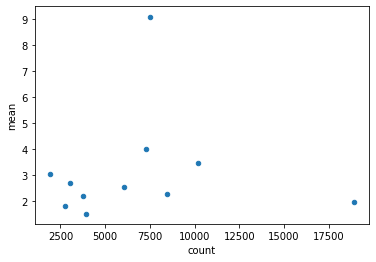

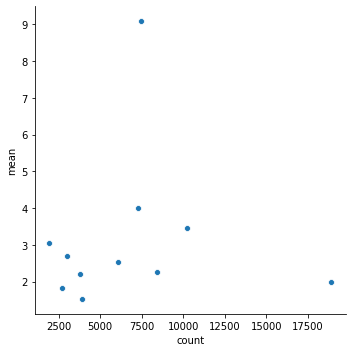

In [13]:
# Average likes per tweet by Department

per_d = df.groupby("Department").likes.describe()
print(per_d)

per_d.plot.scatter('count', 'mean')
sns.relplot(x="count", y="mean", data=per_d);

Text(0, 0.5, '')

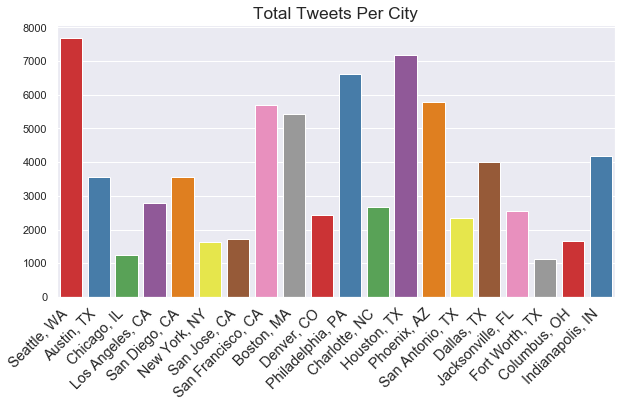

In [202]:
# Total Tweets per city 
plt.figure(figsize=(10,5))

tt= sns.countplot(data=df, x='City', palette='Set1')
tt.set_title('Total Tweets Per City', fontsize= 'x-large')
tt.set_xticklabels(tt.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',
    fontsize='large')
tt.set_xlabel('')
tt.set_ylabel('')

Text(0, 0.5, '')

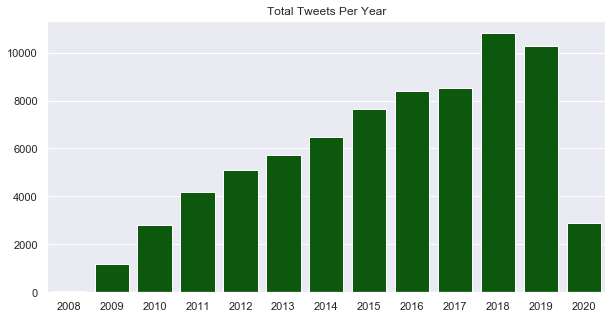

In [217]:
# Total Tweets per Year

plt.figure(figsize=(10,5))
tt= sns.countplot(data=df, x='year', color='darkgreen')
tt.set_title('Total Tweets Per Year')
tt.set_xlabel("Year")
tt.set_xlabel('')
tt.set_ylabel('')


#tt.set_xticks([])
#tt.show()
# Put the legend out of the figure
#tt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [166]:
ax = sns.lineplot(x="year", y= df.count("tweet"), data=df)

ValueError: No axis named tweet for object type <class 'pandas.core.frame.DataFrame'>

AxesSubplot(0.125,0.125;0.775x0.755)


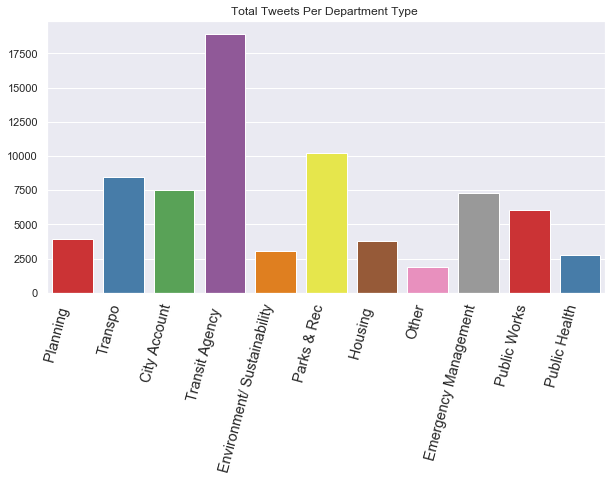

In [219]:
# Total Tweets per Department type

#dpt = sns.countplot(data=df, hue="Department", x='Department')
#dpt.set_title('Total Tweets Per Department Type ')
#dpt.set_xticks([])
#tt.set_xticklabels(labels, rotation=90)
#dpt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#p rint(dpt)

plt.figure(figsize=(10,5))
dpt2 = sns.countplot(data=df, x='Department', palette='Set1')
dpt2.set_title('Total Tweets Per Department Type ')
dpt2.set_xticklabels(dpt2.get_xticklabels(), rotation=75, horizontalalignment='right', fontweight='light',
    fontsize='large')
dpt2.set_xlabel('')
dpt2.set_ylabel('')
print(dpt2)


[Text(0, 0, 'Seattle, WA'),
 Text(0, 0, 'Austin, TX'),
 Text(0, 0, 'Chicago, IL'),
 Text(0, 0, 'Los Angeles, CA'),
 Text(0, 0, 'San Diego, CA'),
 Text(0, 0, 'New York, NY'),
 Text(0, 0, 'San Jose, CA'),
 Text(0, 0, 'San Francisco, CA'),
 Text(0, 0, 'Boston, MA'),
 Text(0, 0, 'Denver, CO'),
 Text(0, 0, 'Philadelphia, PA'),
 Text(0, 0, 'Charlotte, NC'),
 Text(0, 0, 'Houston, TX'),
 Text(0, 0, 'Phoenix, AZ'),
 Text(0, 0, 'San Antonio, TX'),
 Text(0, 0, 'Dallas, TX'),
 Text(0, 0, 'Jacksonville, FL'),
 Text(0, 0, 'Fort Worth, TX'),
 Text(0, 0, 'Columbus, OH'),
 Text(0, 0, 'Indianapolis, IN')]

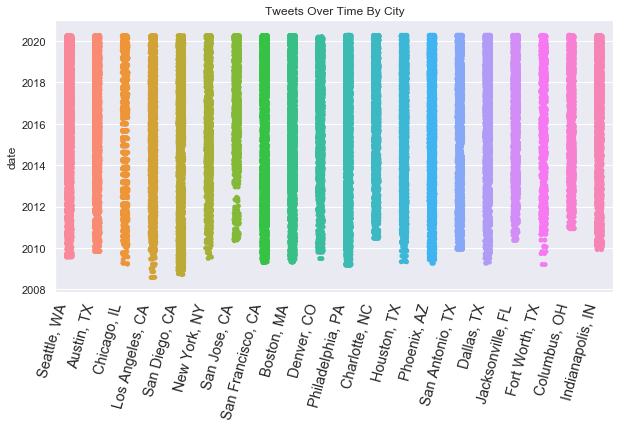

In [239]:
# tweets per city over time (stripplot )

plt.figure(figsize=(10,5))
ax = sns.stripplot(x='City', y='date', data=df)
ax.set_title('Tweets Over Time By City')
#ax.set_xticklabels("City")
ax.set_xlabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, horizontalalignment='right', fontweight='light',
    fontsize='large')

#jitter=0.001, linewidth=.5



#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.show()

[Text(0, 0, 'Planning '),
 Text(0, 0, 'Transpo'),
 Text(0, 0, 'City Account'),
 Text(0, 0, 'Transit Agency '),
 Text(0, 0, 'Environment/ Sustainability'),
 Text(0, 0, 'Parks & Rec'),
 Text(0, 0, 'Housing '),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Emergency Management'),
 Text(0, 0, 'Public Works'),
 Text(0, 0, 'Public Health')]

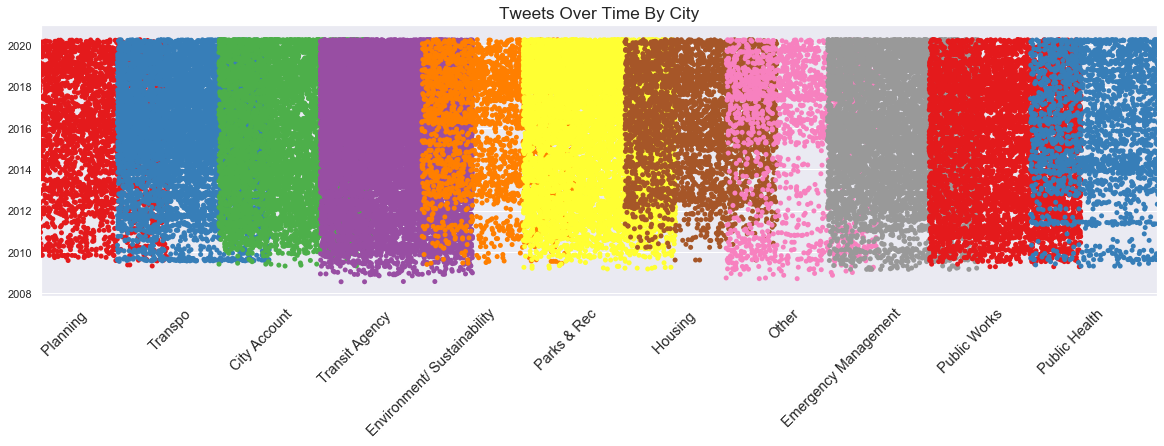

In [278]:
# tweets per city over time (stripplot )

plt.figure(figsize=(20,5))
ax = sns.stripplot(x='Department', y='date', jitter=.75,data=df, palette='Set1')

ax.set_title('Tweets Over Time By City', fontsize="x-large")
#ax.set_xticklabels("City")
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',
    fontsize='large')


In [161]:
df

,Unnamed: 0,username,time,tweet,likes,replies,user_ID,City,Emergency,Department,date,year,tweets
0,0,Seattle Office of Planning & Community Develop...,2016-01-08T23:37:18,OPCD staff visited Lake City today to meet wit...,1,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2016-01-08 23:37:18,2016,opcd staff visited lake city today to meet wit...
1,1,Seattle Office of Planning & Community Develop...,2016-01-08T23:37:18,OPCD staff visited Lake City today to meet wit...,1,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2016-01-08 23:37:18,2016,opcd staff visited lake city today to meet wit...
2,3,Seattle Office of Planning & Community Develop...,2017-10-05T18:31:02,Bonus #ThrowbackThursday post: Ticket stub fro...,0,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2017-10-05 18:31:02,2017,bonus #throwbackthursday post: ticket stub fro...
3,4,Seattle Office of Planning & Community Develop...,2017-09-29T20:17:27,Here's some photos from yesterday's successful...,1,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2017-09-29 20:17:27,2017,here's some photos from yesterday's successful...
4,5,Seattle Office of Planning & Community Develop...,2017-09-15T15:30:05,"A startup aims to stop gentrification, with he...",1,0,SeattleOPCD,"Seattle, WA",1.0,Planning,2017-09-15 15:30:05,2017,"a startup aims to stop gentrification, with he..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74044,264,Indy DBNS,2019-07-18T16:38:45,Good afternoon #Indy! We’re counting down to t...,8,0,IndyDBNS,NaN,NaN,NaN,2019-07-18 16:38:45,2019,good afternoon #indy! we’re counting down to t...
74045,266,Indy DBNS,2019-05-24T18:05:16,Update from our friendly neighbors of @Speedwa...,2,0,IndyDBNS,NaN,NaN,NaN,2019-05-24 18:05:16,2019,update from our friendly neighbors of @speedwa...
74046,267,Indy DBNS,2019-05-16T00:44:05,"If available, join us 2morrow @IndyParksandRec...",2,0,IndyDBNS,NaN,NaN,NaN,2019-05-16 00:44:05,2019,"if available, join us 2morrow @indyparksandrec..."
74047,268,Indy DBNS,2019-05-10T14:42:22,The board is requesting clarification on the u...,1,0,IndyDBNS,NaN,NaN,NaN,2019-05-10 14:42:22,2019,the board is requesting clarification on the u...


AttributeError: 'AxesSubplot' object has no attribute 'set_Ylabel'

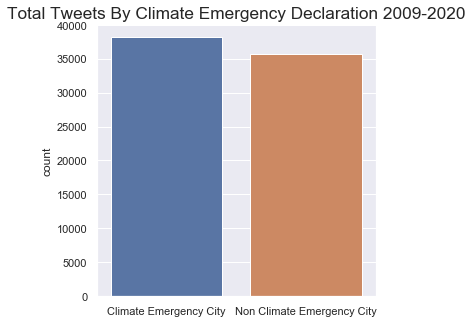

In [287]:
# Total Tweets by climate emergency

plt.figure(figsize=(5,5))
dpt = sns.countplot(data=df, x='Emergency')
dpt.set_title('Total Tweets By Climate Emergency Declaration 2009-2020', fontsize="x-large")
dpt.set_xticklabels(['Climate Emergency City', "Non Climate Emergency City"])
#dpt.set_xticks('Climate Emergency City', "Non Climate Emergency")
#tt.set_xticklabels(labels, rotation=90)
#dpt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
dpt.set_xlabel('')
dpt.set_Ylabel('')

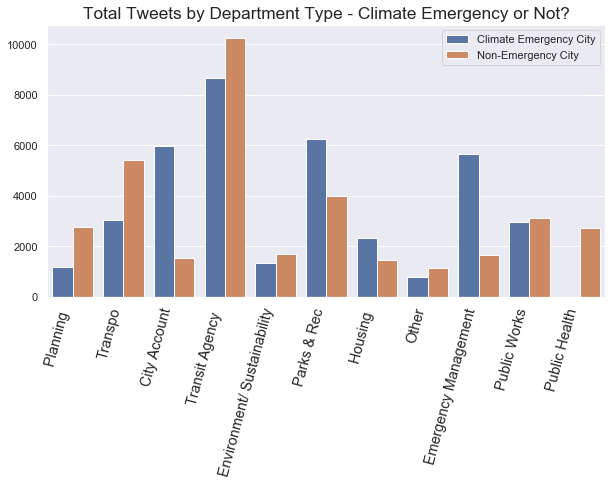

In [279]:
# Total Tweets by Cities that have and have not declared "Climate Emergency - by Department

plt.figure(figsize=(10,5))
ax = sns.countplot(x="Department", hue="Emergency", data=df)
ax.set_title('Total Tweets by Department Type - Climate Emergency or Not?', fontsize='x-large')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, horizontalalignment='right', fontweight='light',
    fontsize='large')
ax.set_xlabel('')
ax.set_ylabel('')
plt.legend(title="", loc="upper right", labels = ["Climate Emergency City", "Non-Emergency City"])
ax

# Account Per City 

In [ ]:
df.grouby()

# Tweets About Climate Change 

Text(0, 0.5, '')

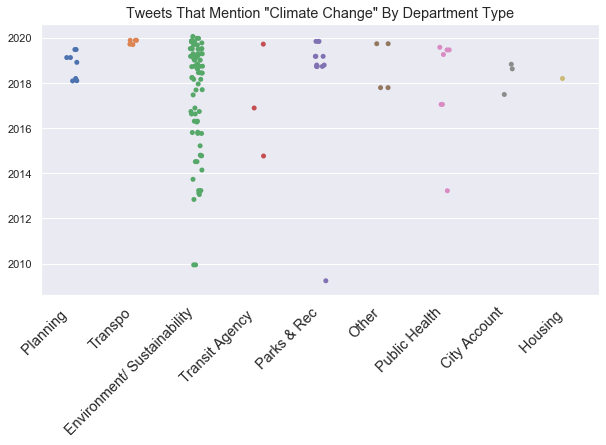

<Figure size 720x360 with 0 Axes>

In [292]:
# total CC tweets by dept type over time (stripplot)


plt.figure(figsize=(10,5))
cc = df.loc[(df['tweets'].str.contains('climate change'))]
ax = sns.stripplot(x='Department', y='date', data=cc)

plt.figure(figsize=(10,5))
ax.set_title('Tweets That Mention "Climate Change" By Department Type', fontsize="large")
#ax.set_xticklabels("City")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light',
    fontsize='large')
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('')
ax.set_ylabel('')

#plt.show()

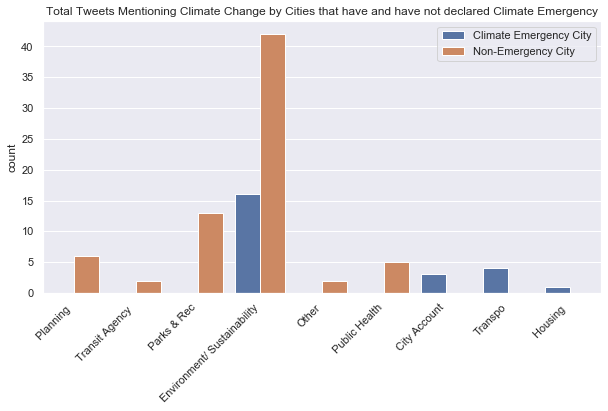

In [300]:
# Total Tweets Mentioning Climate Change by Cities that have and have not declared "Climate Emergency - by Department


plt.figure(figsize=(10,5))
cc = df.loc[(df['tweet'].str.contains('climate change'))]
ax = sns.countplot(x="Department", hue="Emergency", data=cc)
ax.set_title('Total Tweets Mentioning Climate Change by Cities that have and have not declared Climate Emergency')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
ax.set_xlabel('')

plt.legend(title="", loc="upper right", labels = ["Climate Emergency City", "Non-Emergency City"])


#plt.legend(title="", loc="upper right", labels = ["Climate Emergency City", "Non-Emergency City"])


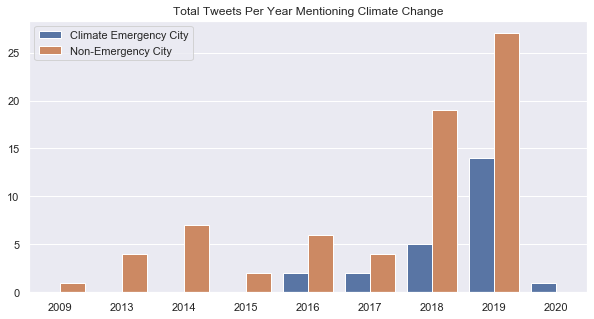

In [305]:
# Total Tweets per Year

plt.figure(figsize=(10,5))
cc = df.loc[(df['tweet'].str.contains('climate change'))]
tt= sns.countplot(data=cc, hue="Emergency", x='year')
tt.set_title('Total Tweets Per Year Mentioning Climate Change')
tt.set_ylabel("")
tt.set_xlabel("")
#tt.set_xticks([])
#tt.show()
plt.legend(title="", loc="upper left", labels = ["Climate Emergency City", "Non-Emergency City"])

Text(0, 0.5, '')

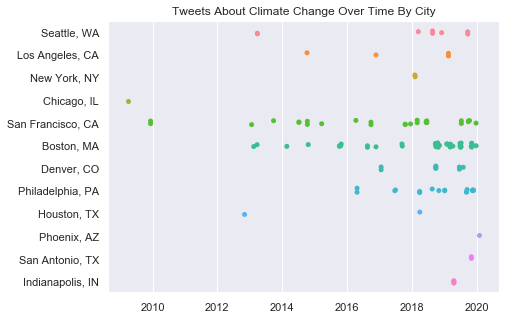

In [313]:
# tweets about CC per city over time? 


plt.figure(figsize=(7,5))
cc = df.loc[(df['tweets'].str.contains('climate change'))]
ax = sns.stripplot(y='City', x='date', data=cc)

ax.set_title('Tweets About Climate Change Over Time By City')
#ax.set_xticklabels("City")
ax.set_xlabel('')
ax.set_ylabel('')
#ax.set_xticks([])
#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plt.show()

[Text(0, 0, 'Seattle, WA'),
 Text(0, 0, 'Los Angeles, CA'),
 Text(0, 0, 'New York, NY'),
 Text(0, 0, 'Chicago, IL'),
 Text(0, 0, 'San Francisco, CA'),
 Text(0, 0, 'Boston, MA'),
 Text(0, 0, 'Denver, CO'),
 Text(0, 0, 'Philadelphia, PA'),
 Text(0, 0, 'Houston, TX'),
 Text(0, 0, 'Phoenix, AZ'),
 Text(0, 0, 'San Antonio, TX'),
 Text(0, 0, 'Indianapolis, IN')]

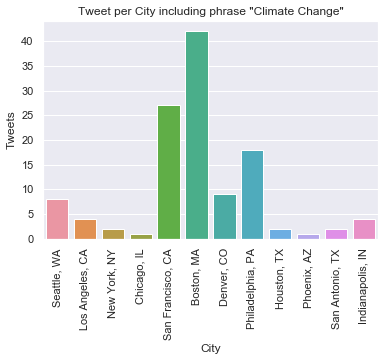

In [314]:
# Tweets Per City Containing Climate Change

cc = df.loc[(df['tweets'].str.contains('climate change'))]

ax = sns.countplot(data=cc, x='City')
#ax.set_xticklabels(labels= x, rotation=90)

ax.set_ylabel('Tweets')
ax.set_title('Tweet per City including phrase "Climate Change"')
#ax.set_xticks(x)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
#ax.legend()

# Tweets about other related topics

In [86]:
#Different key words over time 

# climate change | global warming | sea level rise | greenhouse gas | emissions | resilience | sustainable | sustainability | green | carbon | emissions

words = ["climate change", "global warming","sea level rise", "greenhouse gas", "emissions", "resilience", "sustainable", 
         "sustainability", "green", "carbon"]

words

['climate change',
 'global warming',
 'sea level rise',
 'greenhouse gas',
 'emissions',
 'resilience',
 'sustainable',
 'sustainability',
 'green',
 'carbon']

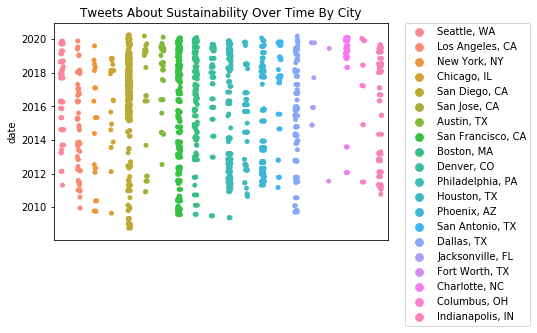

In [85]:
#Tweets About Sustainability Over Time By City

df = df.loc[(df['tweets'].str.contains('climate change | global warming | sea level rise | greenhouse gas | emissions | resilience | sustainable | sustainability | green | carbon | emissions'))]


ax = sns.stripplot(x='City', y='date', data=df, hue="City")

ax.set_title('Tweets About Sustainability Over Time By City')
#ax.set_xticklabels("City")
ax.set_xlabel('')
ax.set_xticks([])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#plt.show()
# df = pd.DataFrame(['hello', 'world', 'hehe'], columns=['words'])

#df.loc[(df['tweets'].str.count("climate change|wo"))]

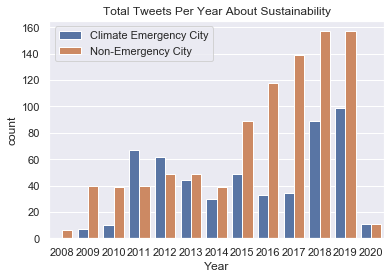

In [315]:
tt = df.loc[(df['tweets'].str.contains('climate change | global warming | sea level rise | greenhouse gas | emissions | resilience | sustainable | sustainability | green | carbon | emissions'))]
tt= sns.countplot(data=tt, hue="Emergency", x='year')
tt.set_title('Total Tweets Per Year About Sustainability')
tt.set_xlabel("Year")
#tt.set_xticks([])
#tt.show()
plt.legend(title="", loc="upper left", labels = ["Climate Emergency City", "Non-Emergency City"])

In [87]:
cc = df.loc[(df['tweets'].str.contains('climate change'))] 
gw = df.loc[(df['tweets'].str.contains('global warming'))] 
# | global warming | sea level rise | greenhouse gas | emissions | resilience | sustainable | sustainability | green | carbon | emissions'))]

len(gw)

2

In [177]:

# make a for loop for all the words to make this - 


#function(container) = 

#cc = df.loc[(df['tweets'].str.contains('climate change'))]

def container(word): #this will allow us to merge dataframes "*" allows us to pass X dataframes
    ax = df.loc[(df['tweets'].str.contains(word))]
    return len(ax)
    

container("global warming")

#for city in words:
    

3

# Likes per tweet stuff

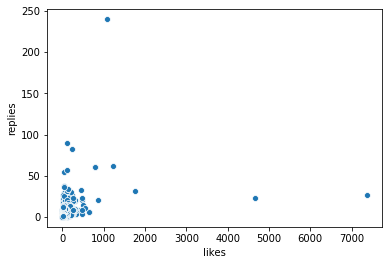

In [70]:
ax = sns.scatterplot(x="likes", y="replies", data=df)

# Random stuff to use later 

not functional yet

In [ ]:
# buildings.loc[buildings.stories<7].groupby('stories').year_built.describe()# buildings.loc[buildings.stories<7].groupby('stories').year_built.describe()

In [ ]:
data = trips.loc[(trips['mode'] == 2) &  # bicycle trips
                 (trips.trip_distance_miles <= 10)]

# Note that a distplot takes a Series directly, rather than a DataFrame + colnames
ax = sns.distplot(a=data.trip_distance_miles)

ax.set_title('Distance of bicycle trips in California')
plt.show()

In [ ]:
cty = cc.groupby("City")
ax = sns.countplot(x='user_ID', data=cty)
ax.set_xticklabels(rotation=90)
plt.show()

In [ ]:
df.plot(x= count('tweet'), y= 'date')

In [ ]:
# Total tweets over time


tot= sns.countplot(data=df, x='City')
tt.set_title('Total Tweets Per City')
#tt.set_xticklabels(labels, rotation=90)
plt.show()


data = df.loc[(df['C'] == 2) &  # bicycle trips
                 (trips.trip_distance_miles <= 10)]

data = trips.loc[(trips['mode'] == 2) &  # bicycle trips
                 (trips.trip_distance_miles <= 10)]

# Note that a distplot takes a Series directly, rather than a DataFrame + colnames
ax = sns.distplot(a=data.trip_distance_miles)

ax.set_title('Distance of bicycle trips in California')
plt.show()




#data = df.loc[("Climate Emergency?" = 1)]

ax = sns.kdeplot(data.loc[data['City']].trip_distance_miles, 
                 color = 'orange', 
                 label = 'walking trips')

# Additional plots will show up on the same axes by default
ax = sns.kdeplot(data.loc[data['mode']==2].trip_distance_miles, 
                 color = 'olive',
                 label = 'bicycling trips')

ax = sns.kdeplot(data.loc[data['mode']==15].trip_distance_miles, 
                 color = 'midnightblue',
                 label = 'bus trips')

ax.set_xlim(-.1,5)
ax.set_xlabel('miles')
ax.set_yticks([])
ax.set_title('Distance distribution of trips by mode')
plt.show()






data = trips.loc[(trips.trip_distance_miles <= 5)]

ax = sns.kdeplot(data.loc[data['mode']==1].trip_distance_miles, 
                 color = 'orange', 
                 label = 'walking trips')

# Additional plots will show up on the same axes by default
ax = sns.kdeplot(data.loc[data['mode']==2].trip_distance_miles, 
                 color = 'olive',
                 label = 'bicycling trips')

ax = sns.kdeplot(data.loc[data['mode']==15].trip_distance_miles, 
                 color = 'midnightblue',
                 label = 'bus trips')

ax.set_xlim(-.1,5)
ax.set_xlabel('miles')
ax.set_yticks([])
ax.set_title('Distance distribution of trips by mode')
plt.show()